# Signature Forgery Detection

---

<br>

Lab: P4 <br>
Group: 16 <br>
Team Members:
1. Gerald Tan Liang Chee (2303173)
2. Jovan Lim Yu Hang (2303397)
3. Lim Jing Yu (2303001)
4. Nigel Lim Wei Siang (2302942)
5. Rachel Wan Jing Mun (2303024)
6. Ranson Chong Sian Sen (2303174)

# 1. Problem Statement and Data Collection
<hr>

<b>Problem Statement</b>

Signature fraud is a significant issue in the financial sector, it involves the unauthorized usage of an individual's signature for fraudulent transactions. It can lead to substantial financial losses and security breaches. Although exact statistics on signature fraud are not universally compiled, reports from financial institutions highlight a consistent threat. For example, the American Bankers Association's 2019 Deposit Account Fraud Survey Report indicates that check fraud accounted for 47% of industry losses in 2018, totalling $1.3 billion US dollars.

Signature fraud methods range from simple forgery, where the signature is copied by hand or digitally, to more sophisticated forms where signatures are chemically manipulated or duplicated with advanced technologies.

<b>Data Collection</b>

To address the challenge of signature verification, we will utilize the CEDAR signature dataset, a widely recognized benchmark in handwriting analysis research. The CEDAR dataset comprises scanned images of genuine and forged signatures from 55 subjects, totaling 1320 signatures. Each subject has provided 24 genuine signatures, and 24 skilled forgeries were created for each genuine signature by other subjects attempting to imitate the writing style.

This dataset is crucial as it provides a controlled yet varied collection of signature samples, reflecting both intra-person variability and skilled forgery attempts. By training our machine learning models on such a comprehensive dataset, we aim to develop a robust system capable of detecting signature fraud effectively under diverse conditions.



# 2. Data Processing, Feature Extraction,  and Analysis

---

## 2.1 Data Pre-Processing

**Overview of Data Preprocessing**<br>

In this step, we will be conducting data pre-processing where we will preprocess signature images to enhance their quality and split them into signature pairs before model training. The preprocessing steps would be:

1. **Importing Required Libraries**
*   Loading the essential required libraries for the project use.
*   Ensures all necessary dependencies are available for preprocessing, feature extraction, and model training.

2. **Enhancing Image Quality**
*   Converting images to grayscale (if not already).
*   Ensure that the image is in uint8 format for uniform processing.
*   Apply Gaussian Blur to reduce noise while preserving important details.
*   Detect signature strokes using Canny Edge Detection.
*   Convert images to binary format using Otsu’s thresholding.

3. **Visualizing the Before and After Pre-Processing of a few Signatures**
*   Display original signature images to observe their raw quality.
*   Display the processed images to compare with the original images.
*   Visualize the improvements in contrast, edge detection, and noise removal, which ensures clearer features for model training.


4. **Generating Signature Pairs**
*   Create (genuine, genuine) pairs using signature samples from the same individual.
*   Create (genuine, forged) pairs by matching real signatures with their corresponding forgeries.
*   Ensure a balanced dataset by selecting an equal number of both types of pairs.
    * Genuine-Genuine (G-G) Pairs: 276 pairs per individual
    * Genuine-Forged (G-F) Pairs: 276 pairs per individual
* This results in a total dataset of:

    * G-G Pairs: 15,180
    * G-F Pairs: 15,180
    * Total Signature Pairs (X): 30,360

These codes sets up the environment, processes the signature images, visualize changes before and after preprocessing, and generates the structured training pairs to facilitate accurate training our machine learning models.

In [1]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools
import seaborn as sns
import pandas as pd
import time
import psutil
import joblib
from joblib import dump, load

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from skimage.measure import shannon_entropy
from skimage.filters import gabor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py

AttributeError: _UFUNC_API not found

ImportError: numpy.core.umath failed to import


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py

AttributeError: _UFUNC_API not found

ImportError: numpy.core.umath failed to import


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py

AttributeError: _UFUNC_API not found

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [ ]:
# Step 1: Preprocess Individual Images
def preprocess_image(image):
    # Ensure image is valid
    if image is None:
        raise ValueError("Received an invalid image (None). Check file paths or input data.")

    # Convert to grayscale only if the image is not already grayscale
    if len(image.shape) == 3 and image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Ensure image is in uint8 format
    image = np.uint8(image)

    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Edge Detection (Canny)
    edges = cv2.Canny(blurred, 50, 150)

    # Apply Binary Thresholding
    _, thresholded = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return thresholded

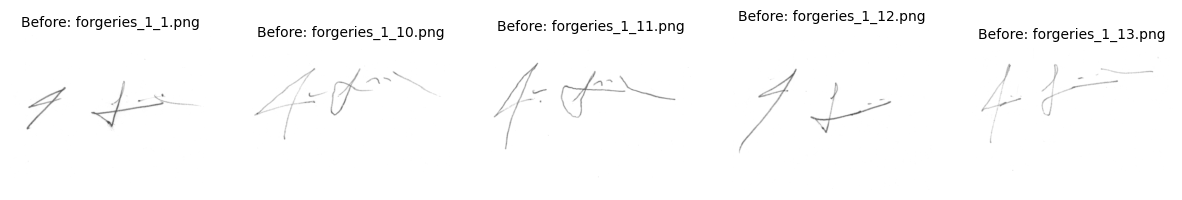

In [ ]:
# Load sample images
def load_sample_images(folder_path, num_samples=5):
    """Loads a few sample images from a given folder for visualization."""
    images = []
    
    filenames = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    filenames = filenames[:num_samples]  

    for filename in filenames:
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 

        if img is not None:
            images.append(img)

    return images, filenames

# Define folder containing signatures
folder_path = "archive/signatures/signatures_1/"

# Load images
original_images, filenames = load_sample_images(folder_path)

# Display images before preprocessing
plt.figure(figsize=(15, 5)) 
for i, img in enumerate(original_images):
    plt.subplot(1, len(original_images), i+1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(f"Before: {filenames[i]}", fontsize=10)
    plt.axis("off")
plt.show()

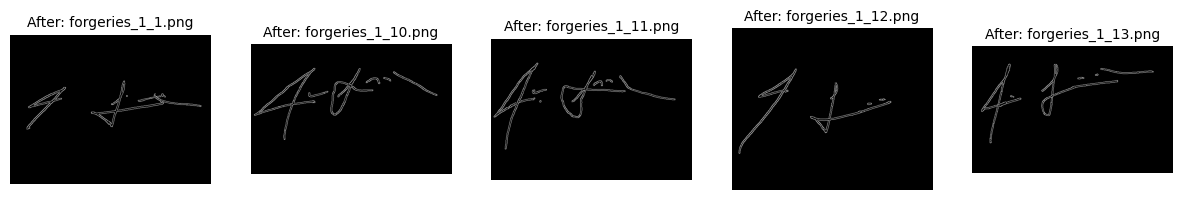

In [ ]:
# Apply preprocessing to images and display them
plt.figure(figsize=(15, 5))
for i, img in enumerate(original_images):
    processed_img = preprocess_image(img) 
    plt.subplot(1, len(original_images), i+1)
    plt.imshow(processed_img, cmap='gray', vmin=0, vmax=255)
    plt.title(f"After: {filenames[i]}", fontsize=10)
    plt.axis("off")
plt.show()

In [ ]:
# Step 2: Pair Genuine & Forged Signatures
def make_pairs(genuine, forged):
    """Creates (genuine, genuine) and (genuine, forged) signature pairs using preprocessed images."""
    
    gen_gen_pairs = [[t[0], t[1]] for t in itertools.combinations(genuine, 2)]
    gen_forg_pairs_temp = [[t[0], t[1]] for t in itertools.product(genuine, forged)]

    gen_gen_pairs = np.array(gen_gen_pairs)
    gen_forg_pairs_temp = np.array(gen_forg_pairs_temp)

    # Pick same number of (genuine, forged) pairs as (genuine, genuine)
    gen_forg_indices = random.sample(range(len(gen_forg_pairs_temp)), len(gen_gen_pairs))
    gen_forg_pairs = np.array([gen_forg_pairs_temp[i] for i in gen_forg_indices])

    return gen_gen_pairs, gen_forg_pairs

## 2.2 Feature Extraction

In this step, we will extract key features from the signature images to help distinguish between genuine and forged signatures. A total of **74 features are extracted per image** across three main categories:

1. **Edge-Based Features (48 features)** 
*   Detects edges using Sobel Gradients to capture the strength and direction of strokes.
*   Generates 32-bin edge magnitude histograms and 16-bin edge orientation histograms to quantify edge distribution.

2. **Texture-Based Features (Gabor Filters) (24 features)**
*   Applies Gabor filters at 3 different frequencies and 4 different orientations to analyze texture patterns in signatures.
*   Extracts mean and variance for each combination, resulting in 12 × 2 = 24 texture features.

3. **Intensity-Based Features (2 features)**
*   Uses CLAHE (Adaptive Histogram Equalization) to enhance contrast.
*   Computes Shannon Entropy (complexity measure) and Variance (intensity spread) to analyze pixel intensity distribution.

These 74 extracted features would provide detailed representation of the signatures, which enables the model to differentiate between genuine and forged signatures effectively.

In [ ]:
# Step 3: Extract Features (Edge, Intensity, Texture)

def extract_features(image):
    features = []
    feature_labels = []  
    
    # Edge
    ## Compute Sobel Gradients (Edge Magnitude & Orientation)
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3) 
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3) 
    edge_magnitude = np.sqrt(sobelx**2 + sobely**2) 
    edge_orientation = np.arctan2(sobely, sobelx) 

    ## Compute Histogram of Edge Magnitude 
    edge_mag_hist, _ = np.histogram(edge_magnitude, bins=32, range=(0, np.max(edge_magnitude)))
    features.extend(edge_mag_hist)
    feature_labels.extend([f"Edge_Mag_Hist_{i}" for i in range(32)])

    ## Compute Histogram of Edge Orientation (Edge Direction)
    edge_orient_hist, _ = np.histogram(edge_orientation, bins=16, range=(-np.pi, np.pi))
    features.extend(edge_orient_hist)
    feature_labels.extend([f"Edge_Orient_Hist_{i}" for i in range(16)])

    # Texture-based (Gabor Filters)
    frequencies = [0.1, 0.2, 0.3] 
    orientations = [0, np.pi/4, np.pi/2, 3*np.pi/4] 
    
    for freq in frequencies:
        for theta in orientations:
            gabor_res, _ = gabor(image, frequency=freq, theta=theta)
            features.append(np.mean(gabor_res)) 
            features.append(np.var(gabor_res))  
            feature_labels.append(f"Gabor_Mean_{freq}_{theta}")
            feature_labels.append(f"Gabor_Var_{freq}_{theta}")

    # Intensity-based (CLAHE)
    ## Apply CLAHE for contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(image)

    ## Compute Entropy (measures complexity)
    entropy = shannon_entropy(enhanced)

    ## Compute Variance (measures intensity spread)
    variance = np.var(enhanced)

    ## Append Intensity Features
    features.extend([entropy, variance])
    feature_labels.extend(["CLAHE_Entropy", "CLAHE_Variance"])
    
    return np.array(features), feature_labels

## 2.3 Normalisation

In this step, we will perform normalisation, using **different scaling techniques** based on the **different feature types** to ensure consistency across the extracted features:

1. **Edge-Based Features (Edge Magnitude & Orientation) → MinMax Scaling**
*   Scales values between 0 and 1 to preserve edge intensity proportions.

2. **Texture-Based Features (Gabor Responses) → Standard Scaling**
*   Centers values around 0 with a standard deviation of 1, improving texture analysis.

3. **Intensity-Based Features (CLAHE Entropy & Variance) → Robust Scaling**
*   Uses median and interquartile range, making it resistant to outliers.

This would ensure all features have a consistent range and distribution, preventing any single feature type from dominating the model training process.

In [ ]:
# Step 4: Normalize & Standardize Pairs

def normalize_features(X):
    
    feature_length = X.shape[-1]  
    X_reshaped = X.reshape(-1, feature_length) 

    # Define the index ranges of each feature type
    edge_indices = list(range(48)) 
    texture_indices = list(range(48, 72))
    intensity_indices = list(range(72, 74)) 

    # MinMaxScaler for Edge Features
    scaler_edge = MinMaxScaler()
    X_reshaped[:, edge_indices] = scaler_edge.fit_transform(X_reshaped[:, edge_indices])

    # StandardScaler for Texture Features
    scaler_texture = StandardScaler()
    X_reshaped[:, texture_indices] = scaler_texture.fit_transform(X_reshaped[:, texture_indices])

    # RobustScaler for Intensity Features
    scaler_intensity = RobustScaler()
    X_reshaped[:, intensity_indices] = scaler_intensity.fit_transform(X_reshaped[:, intensity_indices])

    return X_reshaped.reshape(X.shape)  


## 2.4 Processing the data

In this step, we will process the dataset by preparing data through preprocessing, pairing and feature extraction, followed by loading and saving the processed dataset.

1. **Preparing Data for Training**
*   Preprocess images (contrast enhancement, edge detection, thresholding).
*   Generate signature pairs (genuine-genuine and genuine-forged).
*   Extract edge, texture, and intensity features.
*   Normalize features using appropriate scalers.
*   Shuffle data to prevent ordering bias.

2. **Loading Signature Images**
*   Reads genuine and forged signatures from the dataset directory *(archive/signatures/)*.
*   Iterates through 55 individuals, loading their 24 genuine and 24 forged signatures each. 
*   Inverts pixel values (255 - image) to ensure correct black-and-white contrast.
*   Resizes all images to 200×150 pixels for uniformity.
*   Assigns the loaded signatures into genuine and forged arrays.

3. **Final Dataset**
*   The processed feature dataset (X = 30,360) contains signature pair features.
*   The labels (y) indicate whether a pair is genuine (1) or forged (0).
* The final dataset shape is X.shape = **(30,360, 2, 74)**, where:
    * **30,360** represents the total number of signature pairs.
    * **2** represents the two images in each pair (genuine-genuine or genuine-forged).
    * **74** represents the number of extracted features per image.
*   Saves **X.npy** and **y.npy** for efficient storage and reuse in model training.

This structured processing pipeline ensures the dataset is well-organized, feature-rich, and optimized for model training.

In [ ]:
# Step 5: Prepare Data Pipeline
def prepare_data(genuine, forged, X, y):
    
    # Preprocess images BEFORE pairing
    genuine = np.array([preprocess_image(img) for img in genuine])
    forged = np.array([preprocess_image(img) for img in forged])

    # Step 2: Pair images
    gen_gen_pairs, gen_forg_pairs = make_pairs(genuine, forged)

    # Step 3: Extract features from pairs
    gen_gen_features = np.array([[extract_features(pair[0])[0], extract_features(pair[1])[0]] for pair in gen_gen_pairs])
    gen_forg_features = np.array([[extract_features(pair[0])[0], extract_features(pair[1])[0]] for pair in gen_forg_pairs])

    all_pairs = np.concatenate((gen_gen_features, gen_forg_features), axis=0)
    print(f"All pairs shape: {all_pairs.shape}") 

    # Labels (1 for genuine-genuine pairs, 0 for genuine-forged pairs)
    labels = np.concatenate((np.ones(gen_gen_pairs.shape[0]), np.zeros(gen_forg_pairs.shape[0])), axis=0)
    print(f"Labels shape: {labels.shape}") 

    # Step 4: Apply Standard Scaling
    all_pairs = normalize_features(all_pairs)

    # Shuffle Data
    combined = list(zip(all_pairs, labels))
    random.shuffle(combined)
    shuffled_pairs, shuffled_labels = zip(*combined)

    X[:] = shuffled_pairs
    y[:] = shuffled_labels

In [ ]:
# Step 6: Load and Process Dataset
parent_path = "archive/signatures/"

width = 200
height = 150
num_sig = 55
feature_length = 74 
X = np.zeros((num_sig * 2 * 276, 2, feature_length), dtype=np.float32)
y = np.zeros((num_sig * 2 * 276), dtype=np.float32)

m = 0
for ind in range(1, num_sig+1):

    print(f"Iteration number {m+1}")
    genuine = np.zeros((24, height, width), dtype=np.uint8)
    forged = np.zeros((24, height, width), dtype=np.uint8)

    path = os.path.join(parent_path, f"signatures_{ind}")

    i = 0
    j = 0
    for image in os.listdir(path):
        image_path = os.path.join(path, image)
        if os.path.isfile(image_path):
          img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
          img = 255 - img
          img = cv2.resize(img, (width, height))
          if i < 24 and image.startswith("original"):
            genuine[i] = img
            i += 1
          elif j < 24 and image.startswith("forgeries"):
            forged[j] = img
            j += 1

    prepare_data(genuine, forged, X[m*552:(m+1)*552], y[m*552:(m+1)*552])
    m += 1

print(f"X shape : {X.shape}")
print(f"y shape : {y.shape}")

Iteration number 1
All pairs shape: (552, 2, 74)
Labels shape: (552,)
Iteration number 2
All pairs shape: (552, 2, 74)
Labels shape: (552,)
Iteration number 3
All pairs shape: (552, 2, 74)
Labels shape: (552,)
Iteration number 4
All pairs shape: (552, 2, 74)
Labels shape: (552,)
Iteration number 5
All pairs shape: (552, 2, 74)
Labels shape: (552,)
Iteration number 6
All pairs shape: (552, 2, 74)
Labels shape: (552,)
Iteration number 7
All pairs shape: (552, 2, 74)
Labels shape: (552,)
Iteration number 8
All pairs shape: (552, 2, 74)
Labels shape: (552,)
Iteration number 9
All pairs shape: (552, 2, 74)
Labels shape: (552,)
Iteration number 10
All pairs shape: (552, 2, 74)
Labels shape: (552,)
Iteration number 11
All pairs shape: (552, 2, 74)
Labels shape: (552,)
Iteration number 12
All pairs shape: (552, 2, 74)
Labels shape: (552,)
Iteration number 13
All pairs shape: (552, 2, 74)
Labels shape: (552,)
Iteration number 14
All pairs shape: (552, 2, 74)
Labels shape: (552,)
Iteration numbe

In [ ]:
np.save("X.npy", X)
np.save("y.npy", y) 

## 2.5 Exploratory Data Analysis (EDA) and Visualisation

### 2.5.1 Overall Trends and Patterns

To gain a better understanding of the extracted features, we first analyze the **overall trends and patterns** across the three feature categories: **Edge, Texture, and Intensity**. These features were computed from both genuine and forged signatures, capturing key differences in signature characteristics.

To effectively compare the distributions of genuine and forged signatures, we employ side-by-side bar charts for each feature category. This visualization approach helps us observe **patterns and variations**, such as differences in edge magnitude, texture complexity, and intensity distribution between genuine and forged signatures. While this analysis does not directly influence feature selection for model training, it provides valuable insights into the dataset and helps in understanding how these features behave in distinguishing genuine signatures from forgeries.

---

Edge Features

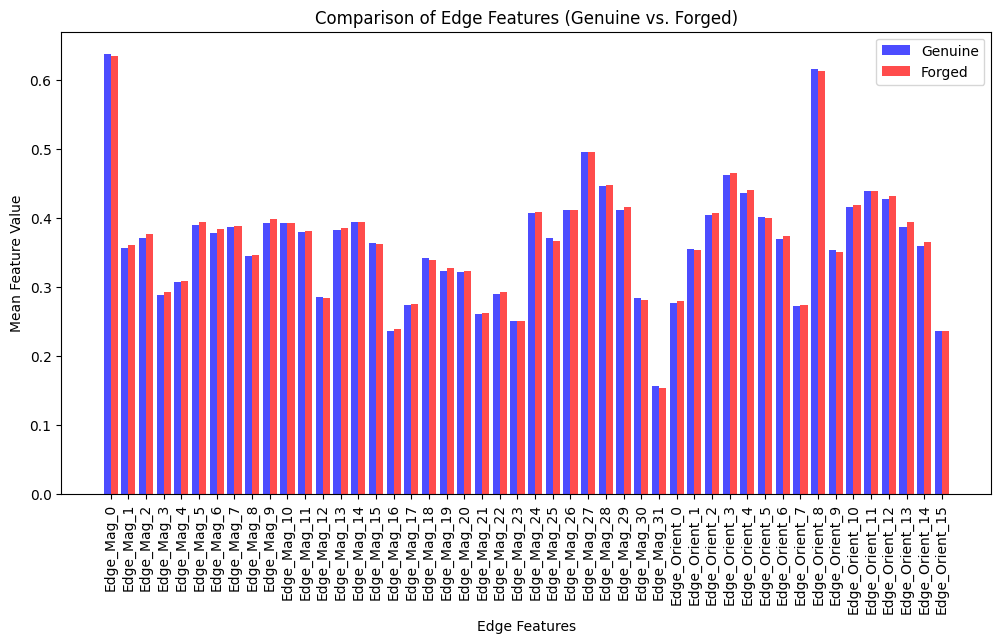

In [ ]:
# Load X and y
X = np.load("X.npy", allow_pickle=True)
y = np.load("y.npy", allow_pickle=True)

# Define Feature Labels
feature_labels = (
    [f"Edge_Mag_{i}" for i in range(32)] +
    [f"Edge_Orient_{i}" for i in range(16)] +
    [f"Gabor_Mean_{freq}_{theta}" for freq in [0.1, 0.2, 0.3] for theta in [0, np.pi/4, np.pi/2, 3*np.pi/4]] +
    [f"Gabor_Var_{freq}_{theta}" for freq in [0.1, 0.2, 0.3] for theta in [0, np.pi/4, np.pi/2, 3*np.pi/4]] +
    ["CLAHE_Entropy", "CLAHE_Variance"]
)

# Convert X into a DataFrame
df_X = pd.DataFrame(X[:, 0, :], columns=feature_labels)
df_y = pd.Series(y, name="Forgery Label")

# Separate genuine and forged samples
df_X["Forgery Label"] = df_y
df_genuine = df_X[df_X["Forgery Label"] == 1].drop(columns=["Forgery Label"])
df_forged = df_X[df_X["Forgery Label"] == 0].drop(columns=["Forgery Label"])

# Splitting Edge, Texture, and Intensity Features
edge_features = [col for col in feature_labels if "Edge_Mag" in col or "Edge_Orient" in col]
texture_features = [col for col in feature_labels if "Gabor_Mean" in col or "Gabor_Var" in col]
intensity_features = ["CLAHE_Entropy", "CLAHE_Variance"]

# Plot Edge Features
plt.figure(figsize=(12, 6))
genuine_means = df_genuine[edge_features].mean()
forged_means = df_forged[edge_features].mean()

plt.bar(np.arange(len(genuine_means)) - 0.2, genuine_means, width=0.4, label="Genuine", alpha=0.7, color='blue')
plt.bar(np.arange(len(forged_means)) + 0.2, forged_means, width=0.4, label="Forged", alpha=0.7, color='red')

plt.xticks(ticks=np.arange(len(genuine_means)), labels=genuine_means.index, rotation=90)
plt.xlabel("Edge Features")
plt.ylabel("Mean Feature Value")
plt.title("Comparison of Edge Features (Genuine vs. Forged)")
plt.legend()
plt.show()

Observations:
1. Across most edge magnitude and edge orientation features, the mean values for genuine and forged signatures are relatively close. This suggests that the overall edge structure in forged signatures attempts to closely mimic that of genuine signatures.
2. There are distinctive differences in certain features. E.g. Edge_Mag_0, Edge_Mag_28, Edge_Mag_30 show noticeable differences, where the genuine signatures have higher values than forged ones. Similarly, a few Edge Orientation features (e.g., Edge_Orient_6, Edge_Orient_8) exhibit visible deviations between the two classes.
3. There are potentially Discriminative Features that show greater separation between genuine and forged signatures may serve as useful indicators in distinguishing between them. Notably, Edge_Mag_0 and Edge_Mag_28 stand out, with genuine signatures having significantly higher edge values. This could indicate that genuine signatures tend to have sharper and more defined edges compared to forgeries.

The analysis of edge features reveals some degree of overlap between genuine and forged signatures, with a few distinctive differences in specific features. These findings provide insight into the structural variations between genuine and forged signatures.

Possible Explanations for These Differences:
- Forgery techniques may introduce subtle inconsistencies in stroke pressure and pen dynamics, leading to weaker or stronger edge magnitudes in certain areas.
- Variations in handwriting stability (e.g., natural vs. imitated strokes) could contribute to the observed patterns in edge orientations.

---

Texture Features

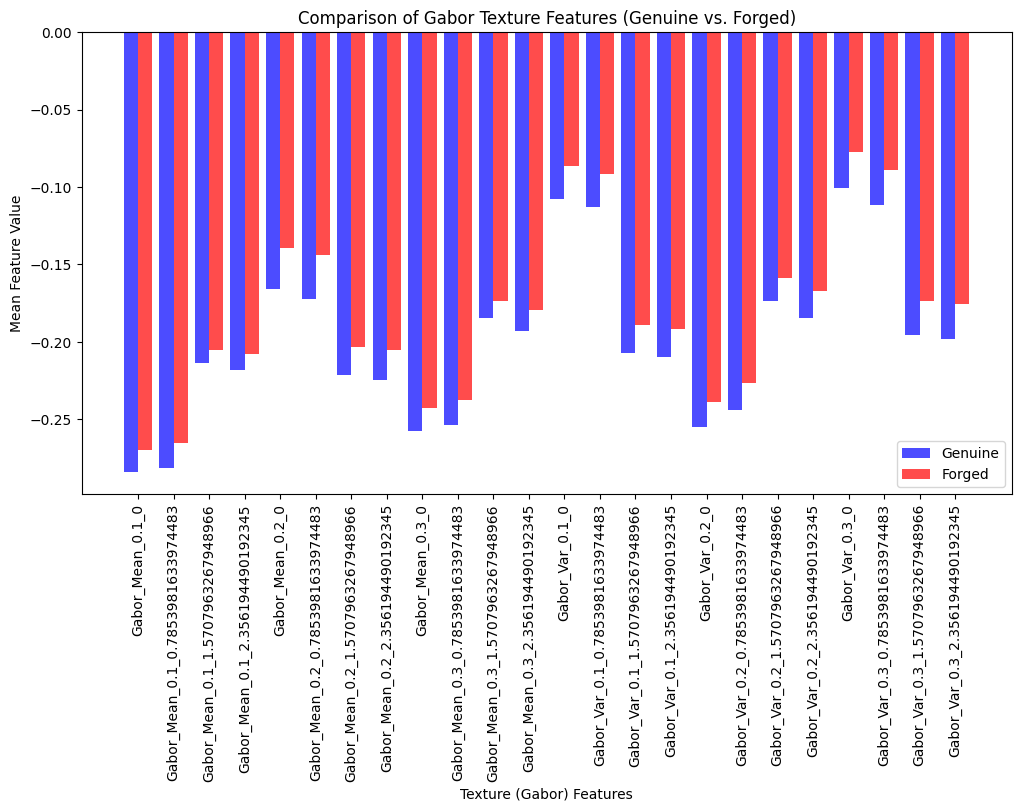

In [ ]:
# Plot Texture Features (Gabor Filters)
plt.figure(figsize=(12, 6))
genuine_means = df_genuine[texture_features].mean()
forged_means = df_forged[texture_features].mean()

plt.bar(np.arange(len(genuine_means)) - 0.2, genuine_means, width=0.4, label="Genuine", alpha=0.7, color='blue')
plt.bar(np.arange(len(forged_means)) + 0.2, forged_means, width=0.4, label="Forged", alpha=0.7, color='red')

plt.xticks(ticks=np.arange(len(genuine_means)), labels=genuine_means.index, rotation=90)
plt.xlabel("Texture (Gabor) Features")
plt.ylabel("Mean Feature Value")
plt.title("Comparison of Gabor Texture Features (Genuine vs. Forged)")
plt.legend()
plt.show()

Observations:
1. The majority of Gabor Mean and Gabor Variance features exhibit small differences between genuine and forged signatures. This suggests that forged signatures attempt to replicate the texture patterns of genuine signatures.
2. Distinctive Differences spotted are some Gabor Mean features (e.g., Gabor_Mean_0.2_1.5707963267948966, Gabor_Mean_0.3_0) show noticeable deviations, where genuine signatures have lower feature values than forgeries. Similarly, certain Gabor Variance features (e.g., Gabor_Var_0.1_2.356194490192345, Gabor_Var_0.3_1.5707963267948966) exhibit distinct gaps between the two classes, suggesting that genuine and forged signatures may have different levels of texture variation.
3. Potentially discriminative features that exhibit a greater separation between genuine and forged signatures may serve as useful indicators for classification. Notably, Gabor_Var_0.2_0.7853981633974483 and Gabor_Var_0.3_2.356194490192345 show clear differences, suggesting that forged signatures may have inconsistencies in texture patterns compared to genuine ones. Additionally, Gabor Variance features generally exhibit greater variation between the two classes than Gabor Mean features, indicating that texture fluctuation may be a stronger indicator of forgery than absolute texture intensity.

The analysis of Gabor texture features reveals a mix of similarities and key differences between genuine and forged signatures. While many features remain close, some Gabor Mean and Gabor Variance features exhibit noticeable deviations, which could be helpful for distinguishing forgeries.

Possible Explanations for These Differences:

- Gabor filters capture fine details and texture patterns, which might differ in forged signatures due to variations in stroke pressure, ink distribution, or subtle inconsistencies in replication attempts.
- Forgeries may introduce unnatural texture variations due to differences in writing pressure, speed, or tremor effects when trying to imitate another person's signature.

--- 

Intensity Features 

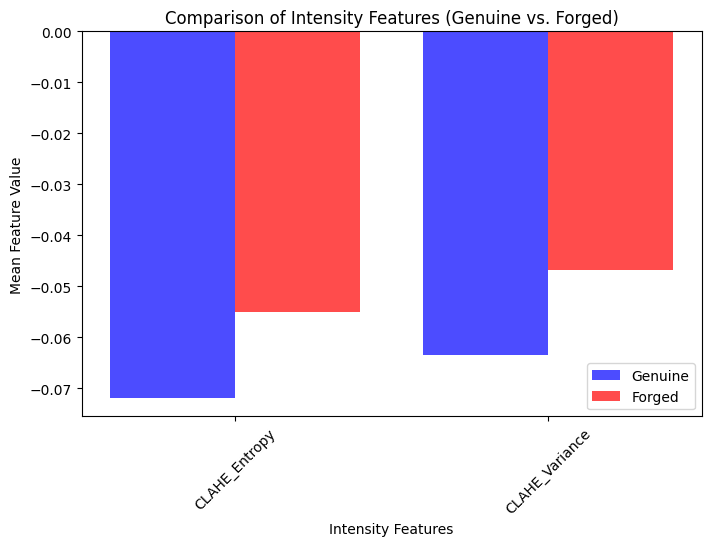

In [ ]:
# Plot Intensity Features (CLAHE)
plt.figure(figsize=(8, 5))
genuine_means = df_genuine[intensity_features].mean()
forged_means = df_forged[intensity_features].mean()

plt.bar(np.arange(len(genuine_means)) - 0.2, genuine_means, width=0.4, label="Genuine", alpha=0.7, color='blue')
plt.bar(np.arange(len(forged_means)) + 0.2, forged_means, width=0.4, label="Forged", alpha=0.7, color='red')

plt.xticks(ticks=np.arange(len(genuine_means)), labels=genuine_means.index, rotation=45)
plt.xlabel("Intensity Features")
plt.ylabel("Mean Feature Value")
plt.title("Comparison of Intensity Features (Genuine vs. Forged)")
plt.legend()
plt.show()

Observations:
1. The CLAHE_Entropy feature shows a clear separation between genuine and forged signatures, with genuine signatures exhibiting lower entropy values compared to forgeries. This suggests that genuine signatures have a more uniform intensity distribution, while forged signatures introduce more randomness or inconsistencies in pixel intensity patterns.
2. The CLAHE_Variance feature also exhibits a difference, where genuine signatures have a lower variance than forged ones. This could indicate that forged signatures may introduce greater intensity fluctuations, possibly due to inconsistencies in pressure, stroke thickness, or pen control.
3. The clear gap in CLAHE_Entropy suggests that this feature might be useful for distinguishing between genuine and forged signatures, as forged signatures tend to have higher intensity entropy due to irregularities in ink distribution and stroke consistency. Similarly, CLAHE_Variance could indicate that forged signatures exhibit more variations in intensity, which might result from unnatural replication techniques.

The analysis of CLAHE intensity features reveals clear differences between genuine and forged signatures, particularly in entropy and variance. These differences suggest that forged signatures tend to have less uniform intensity distributions and higher variation, possibly due to differences in writing pressure, stroke consistency, or replication techniques.

Possible Explanations for These Differences:

- Genuine signatures are written with a natural and consistent pressure, leading to more uniform intensity distribution (lower entropy).
- Forged signatures may exhibit inconsistent pressure and ink distribution, leading to higher entropy and variance in intensity.
- Shakiness or unnatural stroke replication in forgeries could contribute to higher variance in intensity levels compared to naturally written signatures.

---

Therefore, the analysis of edge, texture, and intensity features highlights both similarities and key differences between genuine and forged signatures. While most edge features show close resemblance between the two classes, certain edge magnitude values (e.g., Edge_Mag_0, Edge_Mag_28) indicate that genuine signatures tend to have sharper and more defined edges. In texture features, forgers attempt to replicate genuine texture patterns, but Gabor Variance features reveal greater inconsistencies in forged signatures, suggesting that texture fluctuation is a stronger indicator of forgery than absolute texture intensity. Similarly, in intensity features, genuine signatures exhibit lower entropy and variance, while forged signatures display higher intensity fluctuations, likely due to inconsistent stroke pressure and ink distribution. These findings suggest that no single feature type is fully conclusive, but a combination of edge, texture, and intensity features can provide valuable insights for distinguishing forgeries, with Gabor Variance and CLAHE Entropy emerging as potentially strong indicators for signature forgery detection.

### 2.5.2 In-depth Analyse of Top Features by Category

To gain a deeper understanding of how different features contribute to distinguishing genuine and forged signatures, we identified the most important feature from each category (edge, texture, and intensity) using feature importance scores from **RandomForestClassifier**. While this analysis does not influence feature selection, it provides insights into the characteristics that make these features effective at detecting forgeries.

To analyze these top features in-depth, we employed the following visualization techniques:

1. Density Plot (KDE) – To observe how feature values are distributed between genuine and forged signatures.
2. Histogram – To compare the frequency of feature values across both classes.
3. Boxplot – To examine feature variability, central tendency, and potential outliers.

By analyzing the distributions of these features, we aim to understand the underlying differences in signature characteristics that contribute to forgery detection.

In [ ]:
# Load X and y
X = np.load("X.npy", allow_pickle=True)
y = np.load("y.npy", allow_pickle=True)

# Convert X into a DataFrame
df_X = pd.DataFrame(X[:, 0, :], columns=feature_labels)
df_y = pd.Series(y, name="Forgery Label")

# Train a RandomForest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(df_X, df_y)

# Get Feature Importances from Random Forest
rf_importances = pd.DataFrame({"Feature": feature_labels, "Importance": rf.feature_importances_})
rf_importances = rf_importances.sort_values(by="Importance", ascending=False)

# Group Features by Category
categories = {
    "Edge Magnitude": [f"Edge_Mag_{i}" for i in range(32)],
    "Edge Orientation": [f"Edge_Orient_{i}" for i in range(16)],
    "Gabor Mean": [f"Gabor_Mean_{freq}_{theta}" for freq in [0.1, 0.2, 0.3] for theta in [0, np.pi/4, np.pi/2, 3*np.pi/4]],
    "Gabor Variance": [f"Gabor_Var_{freq}_{theta}" for freq in [0.1, 0.2, 0.3] for theta in [0, np.pi/4, np.pi/2, 3*np.pi/4]],
    "CLAHE Features": ["CLAHE_Entropy", "CLAHE_Variance"],
}

# Get Top Feature per Category (Using Random Forest Importance)
top_features_per_category = {}
for category, features in categories.items():
    top_feature = rf_importances[rf_importances["Feature"].isin(features)].head(1)
    if not top_feature.empty:
        top_features_per_category[category] = top_feature.iloc[0]["Feature"]

# Display the Top Features per Category
top_features_per_category


{'Edge Magnitude': 'Edge_Mag_24',
 'Edge Orientation': 'Edge_Orient_3',
 'Gabor Mean': 'Gabor_Mean_0.2_0',
 'Gabor Variance': 'Gabor_Var_0.3_2.356194490192345',
 'CLAHE Features': 'CLAHE_Entropy'}

 The following top features from each category were chosen for further examination: 
 1. Edge_Mag_24 (Edge Magnitude)
 2. Edge_Orient_3 (Edge Orientation)
 3. Gabor_Mean_0.2_0 (Gabor Mean) 
 4. Gabor_Var_0.3_2.356194490192345 (Gabor Variance)
 5. CLAHE_Entropy (CLAHE Features)
 6. CLAHE_Variance (CLAHE Features)

 We will visualize their distributions to help identify patterns and differences in the data, providing valuable insights into feature behaviour and its relevance to forgery detection.

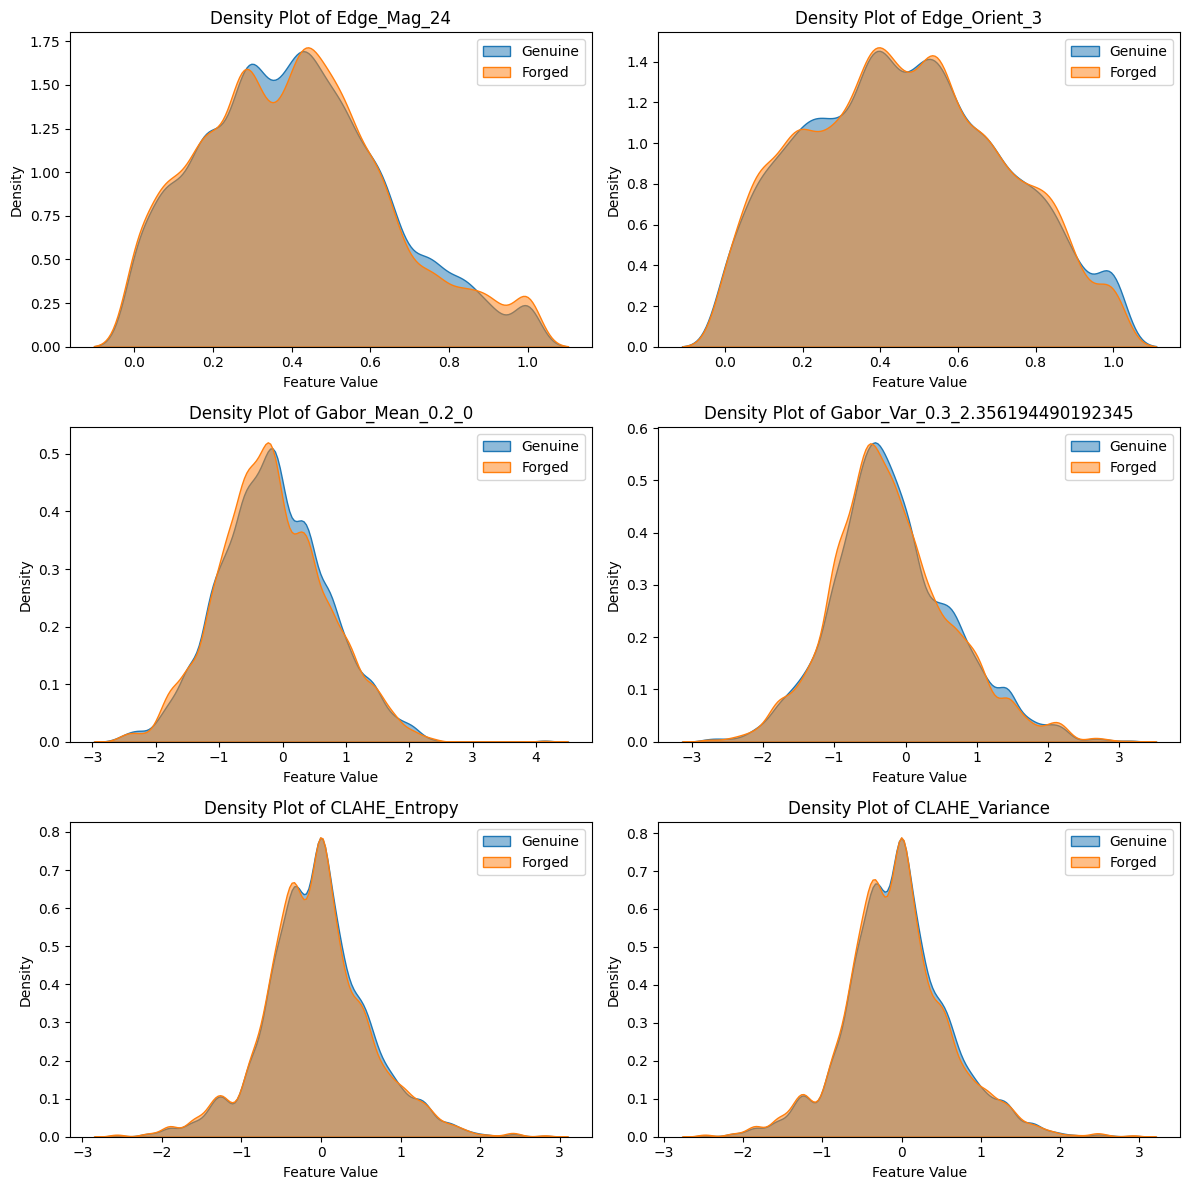

In [ ]:
# Separate Genuine (y=0) and Forged (y=1) Data
df_genuine = df_X[df_y == 0]
df_forged = df_X[df_y == 1]

# Standardize features for better visualization
df_X_standardized = (df_X - df_X.mean()) / df_X.std()

# Adding CLAHE_Variance to the selected features
selected_features = ["Edge_Mag_24", "Edge_Orient_3", "Gabor_Mean_0.2_0", "Gabor_Var_0.3_2.356194490192345", "CLAHE_Entropy", "CLAHE_Variance"]

# Plot individual KDE for each feature
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    sns.kdeplot(df_genuine[feature], label="Genuine", fill=True, alpha=0.5, ax=axes[i])
    sns.kdeplot(df_forged[feature], label="Forged", fill=True, alpha=0.5, ax=axes[i])
    axes[i].set_title(f"Density Plot of {feature}")
    axes[i].set_xlabel("Feature Value")
    axes[i].set_ylabel("Density")
    axes[i].legend()

plt.tight_layout()
plt.show()

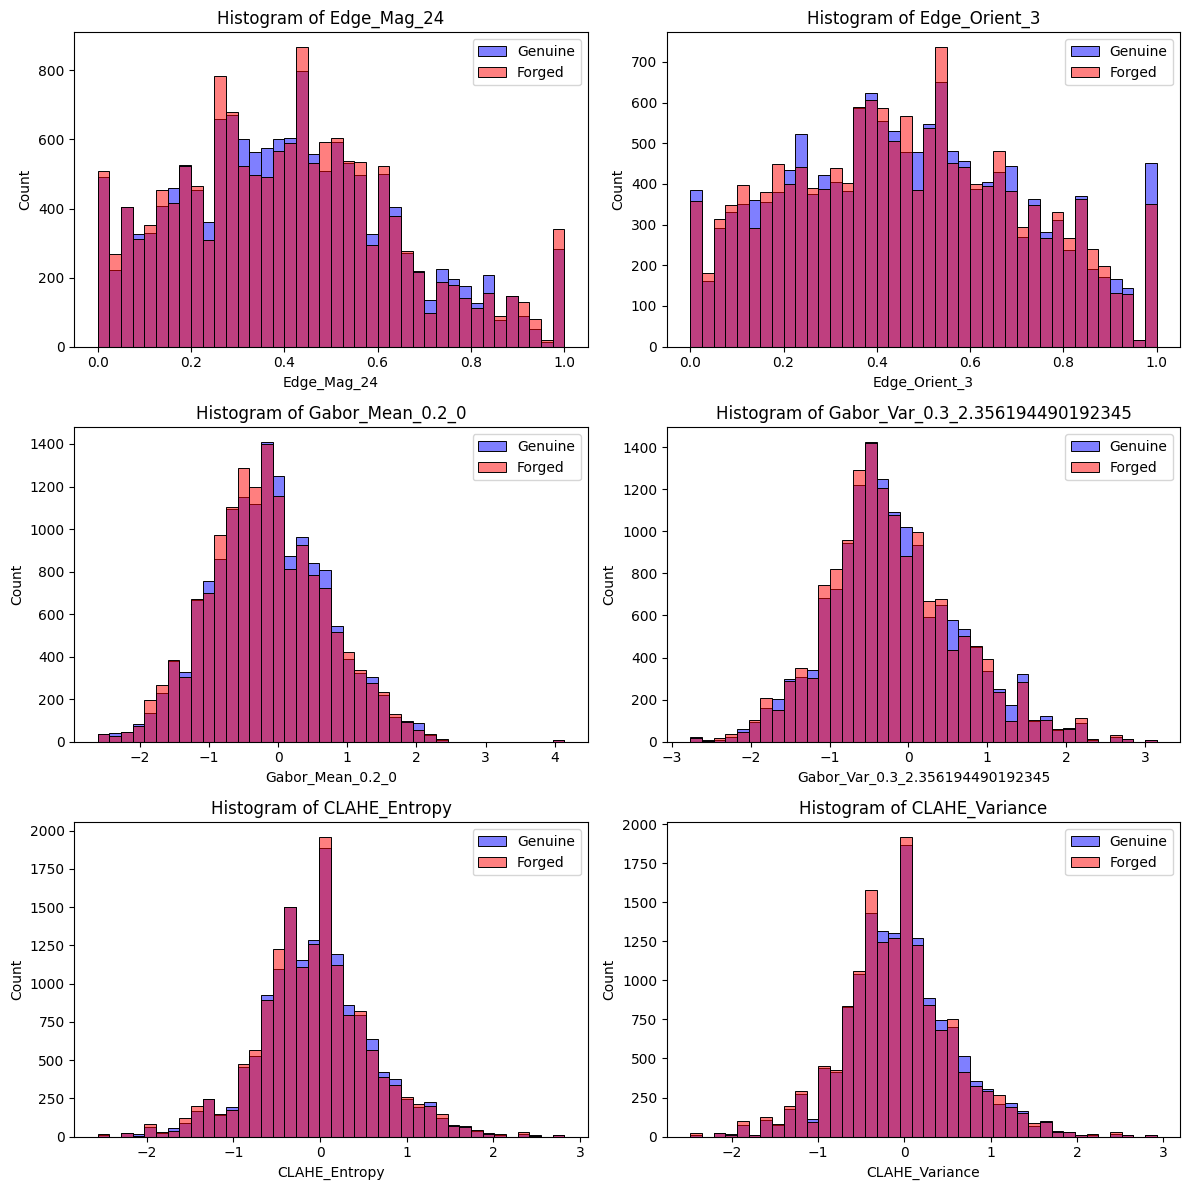

In [ ]:
# Individual Histograms with Smaller Bins
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    sns.histplot(df_genuine[feature], bins=40, color="blue", alpha=0.5, ax=axes[i], label="Genuine")
    sns.histplot(df_forged[feature], bins=40, color="red", alpha=0.5, ax=axes[i], label="Forged")
    axes[i].set_title(f"Histogram of {feature}")
    axes[i].legend()

plt.tight_layout()
plt.show()

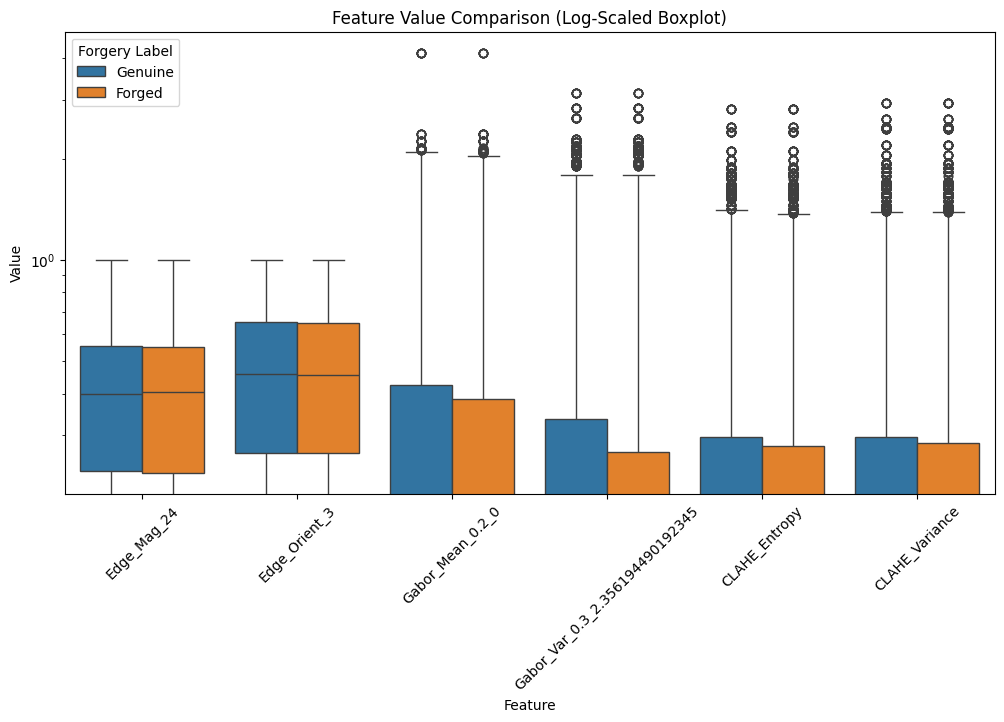

In [ ]:
# Log-Scaled Boxplots (Handles Outliers)
plt.figure(figsize=(12, 6))
df_plot = df_X[selected_features].copy()
df_plot["Forgery Label"] = df_y.replace({0: "Genuine", 1: "Forged"})
df_melted = df_plot.melt(id_vars=["Forgery Label"], var_name="Feature", value_name="Value")

sns.boxplot(data=df_melted, x="Feature", y="Value", hue="Forgery Label")
plt.yscale("log")
plt.xticks(rotation=45)
plt.title("Feature Value Comparison (Log-Scaled Boxplot)")
plt.show()

The three types of visualizations—kernel density estimates (KDEs), histograms, and boxplots — provide different insights into the distribution, variability, and distinguishing power of key features between genuine and forged signatures. Unlike the overall pattern analysis, which examined broad feature trends, this section focuses on how specific features behave at an individual level and what they reveal about forgery patterns.

<b>1. Kernel Density Estimates (KDEs) and Histograms</b>

- KDEs and histograms for features like Edge Magnitude, Edge Orientation, Gabor Mean, Gabor Variance, CLAHE Entropy, and CLAHE Variance reveal differences in distribution shapes and spread between genuine and forged signatures.

- **Edge Features (Edge_Mag_24, Edge_Orient_3)**: The KDE and histogram distributions show high overlap, reinforcing that edge magnitude and orientation alone may not be strong discriminators between genuine and forged signatures. However, subtle variations suggest that forgers may struggle to replicate exact stroke properties.

- **Texture Features (Gabor_Mean_0.2_0, Gabor_Var_0.3_2.356)**: The distributions of Gabor Mean are highly similar, but Gabor Variance exhibits a wider spread in forged signatures, indicating inconsistencies in textural structure caused by variations in pen pressure and stroke replication.

- **Intensity Features (CLAHE_Entropy, CLAHE_Variance)**: Genuine signatures tend to have lower entropy and variance, while forged signatures display greater spread, suggesting fluctuations in ink consistency and stroke pressure due to unnatural replication methods.

<b>2. Boxplots (Log-Scaled)</b>

- <b>Overview:</b> The boxplots provide insights into the central tendency, variability, and presence of outliers in each feature category. The logarithmic scale helps visualize differences more effectively for features with varying value ranges.

- <b>Edge Features</b>: While the median values for edge features remain similar, forged signatures show slightly more spread and outliers, indicating minor inconsistencies in stroke formation.

- **Texture (Gabor Variance)**: Forged signatures exhibit higher variance in texture patterns, reinforcing that Gabor Variance is more sensitive to forgery inconsistencies than Gabor Mean.

- **CLAHE Intensity Features**: Outliers are more frequent and spread out in forgeries, supporting the hypothesis that forgers struggle to maintain uniform stroke intensity, leading to greater intensity fluctuation.

<b>Summary of Insights</b>

- **Why These Features Matter**: Instead of just confirming that Gabor Variance and CLAHE features are useful (which was covered in the overall analysis), this section shows how these features behave and why they contribute to forgery detection.

- **Edge Features Are Less Discriminative**: Despite minor deviations, the high overlap in Edge Magnitude and Orientation suggests they are not as effective as texture and intensity features in detecting forgeries.

- **Texture and Intensity Features Capture Subtle Forgery Inconsistencies**: The higher variance in forged signatures across Gabor Variance and CLAHE-based features suggests that forgers introduce inconsistencies in texture and contrast, which can be leveraged for better classification models.

- **Feature Combinations Are Essential**: Since no single feature is fully conclusive, using a combination of texture and intensity-based features may significantly improve model accuracy.

# 3. Experiment design and machine learning algorithm implementation
<hr>

### **Experiment Design Plan**

To evaluate the effectiveness of different machine learning models in detecting signature forgery, we designed a structured experimental workflow. The CEDAR Signature paired dataset will be split into 70% training and 30% validation, ensuring that the models are trained and fine-tuned before final evaluation. Additionally, a custom real-world test set, consisting of 11 individuals' signatures (approximately 20% of the total CEDAR dataset size), will be used for final testing to assess the model’s generalization to real-world data.
<br><br>
We will train and compare three machine learning models: Support Vector Machine (SVM), Random Forest, and XGBoost. These models were chosen for their ability to handle different types of data structures and classification tasks effectively.

*   **SVM** is well-suited for high-dimensional feature spaces and is known for its strong performance in binary classification problems.
*   **Random Forest**, an ensemble learning method, provides robustness by combining multiple decision trees to reduce overfitting and improve generalization.
*   **XGBoost**, a gradient boosting technique, is included due to its efficiency, scalability, and ability to capture complex patterns in data.

Together, these models allow for a diverse evaluation of classical machine learning approaches in signature forgery detection.
<br><br>
The experiment will be conducted in four phases.

1. **Baseline Model Training** → Train an initial model for each algorithm using default hyperparameters to establish a baseline performance on the validation set.
2. **Hyperparameter Optimization (Grid Search)** → Fine-tune each model by systematically searching for the best hyperparameters to enhance performance.
3. **Scaler Selection** → Train the models using the optimal hyperparameters while experimenting with different feature scaling techniques to determine the most effective scaler.
4. **Final Model Evaluation** → Assess the best-performing models on the validation set to measure performance improvements and ensure generalization.

.<br>
Following these evaluations, we will compare all three tuned models across key **performance metrics** such as accuracy, precision, recall, and F1-score, as well as **computational metrics** including model size, training time, testing time, and memory usage. This comparison will help determine the potentially best-performing model based on both predictive performance and computational efficiency.

However, to ensure a thorough evaluation, all three models will be tested on the real-world test dataset. This step will validate their performance on unseen, real-world signature samples, ultimately determining the best-performing model for signature forgery detection.

Finally, the best-performing classical machine learning model will be compared to an existing deep learning model *(Siamese Network)* to assess how traditional approaches perform relative to deep learning. This comparison will highlight trade-offs in accuracy, efficiency, and interpretability, providing insights into the most effective approach for this task.

- *Please run this code before running the training codes for the models.*

In [22]:
# Load Training Data
X = np.load("X.npy", allow_pickle=True)
y = np.load("y.npy", allow_pickle=True)

# Convert to 2D (Flatten pairs)
X = X.reshape(X.shape[0], -1) 

# Split into 70% Training and 30% Validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## 3.1 Model #1: SVM

### 3.1.1 Baseline Model Training - Model #1

To establish a baseline performance, we will train and evaluate an SVM (Support Vector Machine) model using the extracted features with default hyperparameters. The training process involves the following steps:

1. Feature Scaling (Standardization)
    * StandardScaler() normalizes the data so that all features have zero mean and unit variance.
    * The scaling transformation is fitted on the training set and applied to both training and validation sets to maintain consistency.

2. Training the SVM Model
    * An SVM classifier with a linear kernel (kernel='linear') is trained using SVC().
    * A linear kernel is chosen as a baseline to observe how well a simple linear decision boundary can separate genuine and forged signatures.
    * The model is then fitted on the training data to learn patterns that distinguish between the two classes.

In [ ]:
# Feature Scaling 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_val = scaler.transform(X_val)  

# Train SVM Model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

After training, the model is evaluated on the validation set to assess its initial performance.

1. Making Predictions on the Validation Set
    * Uses the trained SVM model to predict labels for the validation set (X_val).
    * Stores the predictions in y_val_pred.

2. Calculating Validation Accuracy
    * Compares the true labels (y_val) with the predicted labels (y_val_pred).

3. Generating the Classification Report
    * Precision → Measures how many predicted positives are actually correct.
    * Recall → Measures how well the model identifies all actual positives.
    * F1-score → A balance between precision and recall.
    * Support → Number of actual instances per class.

4. Generating the Confusion Matrix
    * Creates a confusion matrix comparing true labels (y_val) vs. predicted labels (y_val_pred).

In [ ]:
# Evaluate on Validation Set
y_val_pred = svm_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"🔹 Validation Accuracy: {val_accuracy:.4f}")

🔹 Validation Accuracy: 0.8412


In [ ]:
# Classification Report (Validation Set)
print("\n🔹 Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred, target_names=["Forged", "Genuine"]))


🔹 Classification Report (Validation Set):
              precision    recall  f1-score   support

      Forged       0.86      0.82      0.84      4554
     Genuine       0.83      0.86      0.84      4554

    accuracy                           0.84      9108
   macro avg       0.84      0.84      0.84      9108
weighted avg       0.84      0.84      0.84      9108



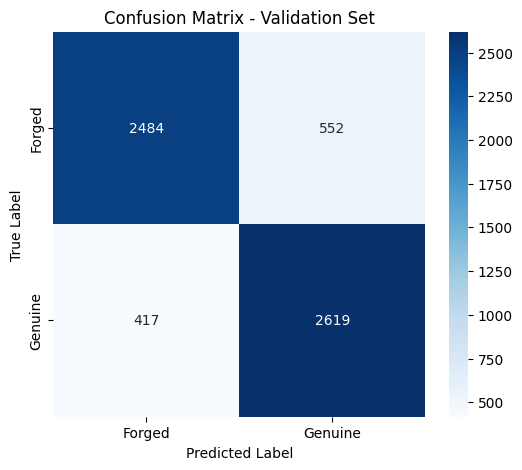

In [ ]:
# Confusion Matrix (Validation Set)
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap="Blues", xticklabels=["Forged", "Genuine"], yticklabels=["Forged", "Genuine"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Validation Set")
plt.show()

The baseline SVM model achieved an overall validation accuracy of 84.12%, demonstrating its ability to distinguish between genuine and forged signatures reasonably well. However, further analysis of the confusion matrix and classification report reveals key performance insights:

1. Confusion Matrix Analysis
    * The model correctly classified 2,484 forged signatures but misclassified 552 forged signatures as genuine (false negatives).
    * It correctly identified 2,619 genuine signatures, while 417 genuine signatures were misclassified as forged (false positives).
    * The model exhibits a slight tendency to misclassify some forged signatures as genuine, which may indicate challenges in detecting highly skilled forgeries.

2. Classification Report Analysis
    * Precision:
        * Forged Signatures: 0.86 → When the model predicts a signature as forged, it is correct 86% of the time.
        * Genuine Signatures: 0.83 → When predicting a signature as genuine, it is correct 83% of the time.
    * Recall:
        * Forged Signatures: 0.82 → The model correctly identifies 82% of all actual forgeries, meaning it misses 18% (false negatives).
        * Genuine Signatures: 0.86 → The model correctly identifies 86% of all actual genuine signatures, meaning it falsely flags 14% as forgeries (false positives).
    * F1-Score:
        * The F1-score for both classes is 0.84, indicating a good balance between precision and recall.

Overall, while the baseline SVM model is effective, the lower recall for forged signatures (82%) suggests that some forgeries go undetected, highlighting a need for further improvements.

### 3.1.2 Hyperparameter Optimization (Grid Search) - Model #1

To enhance the performance of the baseline SVM model, we fine-tuned its hyperparameters using Grid Search with Cross-Validation.

1. Defining the Hyperparameter Grid
    * C: Controls regularization (higher values reduce misclassification).
    * kernel: Chooses the type of decision boundary (linear, rbf, poly).
    * gamma: Affects non-linear kernels (rbf & poly), controlling decision boundary complexity.

2. Initializing the SVM Model
    * Creates a default SVM model (parameters will be tuned using Grid Search).

3. Performing Grid Search with Cross-Validation
    * GridSearchCV automates hyperparameter tuning by testing all parameter combinations.
    * 5-fold cross-validation (cv=5) ensures robust evaluation.
    * Parallel processing (n_jobs=-1) speeds up training.
    * Scores each combination based on accuracy and selects the best.

In [ ]:
# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1] 
}

# Initialize SVM model
svm_model = SVC()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=1)

After performing Grid Search with Cross-Validation, we identified the optimal hyperparameters for the SVM model. The best parameters were:

* C = 100 → Higher regularization strength.
* gamma = 'scale' → Uses default gamma based on feature count.
* kernel = 'rbf' → Non-linear decision boundary.

Best Accuracy = 99.01% → Achieved with these hyperparameters.

In [ ]:
# Get best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}, 0.9901185326635946)

Using the best hyperparameters identified from Grid Search (C=100, gamma='scale', kernel='rbf'), we retrained the SVM model and display its accuracy, training time, testing time, model size, and memory usage to assess its model effectiveness and efficiency.

In [ ]:
# Scale training and validation data
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Initialize SVM with the best parameters
svm_best = SVC(C=100, gamma='scale', kernel='rbf')

# Measure Training Time
start_train = time.time()
svm_best.fit(X_train, y_train)
end_train = time.time()

# Measure Testing Time
start_test = time.time()
val_accuracy = svm_best.score(X_val, y_val)
end_test = time.time()

# Save Model and Get File Size
dump(svm_best, "models/svm_final.joblib")
model_size = os.path.getsize("models/svm_final.joblib") / 1024  

# Check Memory Usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 / 1024  

# Print Metrics
print("🔹 **Model Performance & System Metrics** 🔹")
print(f"✅ Train Accuracy: {svm_best.score(X_train, y_train):.4f}")
print(f"✅ Validation Accuracy: {val_accuracy:.4f}")
print(f"📌 Training Time: {end_train - start_train:.4f} seconds")
print(f"📌 Testing Time: {end_test - start_test:.4f} seconds")
print(f"📌 Model Size: {model_size:.2f} KB")
print(f"📌 Memory Usage: {memory_usage:.2f} MB")


🔹 **Model Performance & System Metrics** 🔹
✅ Train Accuracy: 1.0000
✅ Validation Accuracy: 0.9951
📌 Training Time: 64.4351 seconds
📌 Testing Time: 7.2650 seconds
📌 Model Size: 6200.34 KB
📌 Memory Usage: 158.44 MB


Based on the model performance and system metrics, we observe that while the SVM model achieves near-perfect accuracy, it comes at the cost of **high computational requirements**. 

* The model size (6200.34 KB), 
* Testing time (7.27 seconds), indicate that the model is relatively large and computationally expensive. 

To enhance efficiency without compromising accuracy, we will further refine the model by implementing **feature selection** and finding the **best scaler**. 

### 3.1.3 Scaler Selection - Model #1

We perform feature selection using Mutual Information to identify the most relevant features, then retrain and evaluate the optimized SVM model.

1. Compute Feature Importance (Mutual Information)
    * Calculates feature importance using mutual information.
    * Identifies which features contribute most to distinguishing between classes.

2. Select the Top 35 Most Important Features
    * Sorts features by importance (highest first).
    * Selects the top 35 most relevant features to improve efficiency.

5.  Train SVM Model Using Selected Features
    * Trains SVM with optimized parameters (C=100, gamma='scale', kernel='rbf').
    * Measures training time to assess efficiency.

6.  Evaluate Model Performance
    * Tests the trained SVM model on the validation dataset.
    * Measures accuracy, training/testing time, model size, and memory usage.
    * Confusion matrix

In [ ]:
# Load data 
X = np.load("X.npy")  
y = np.load("y.npy")  

# Check the shape of X to see if it's 3D
print(f"Shape of X: {X.shape}") 

# Flatten X to 2D if it's 3D 
if len(X.shape) == 3:
    X = X.reshape(X.shape[0], -1) 

# Check the shape after flattening
print(f"New shape of X: {X.shape}")  

# Compute Mutual Information Scores
mi_scores = mutual_info_classif(X, y)

# Sort Features by Importance
sorted_indices = np.argsort(mi_scores)[::-1]
top_k = 35  # Select top 35 features
selected_indices = sorted_indices[:top_k]

# Filter X to Keep Only Selected Features
X_selected = X[:, selected_indices]

# Split Data into Training and Validation
X_train, X_val, y_train, y_val = train_test_split(
    X_selected, y, test_size=0.3, random_state=42, stratify=y
)

# Define the scalers
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "MaxAbsScaler": MaxAbsScaler()
}

# Function to train and evaluate SVM with different scalers
def train_and_evaluate_svm_with_scaler(X_train, X_val, y_train, y_val, scaler_name):
    print(f"Training with {scaler_name}...")

    # Apply Scaling
    if scaler_name == "StandardScaler":
        scaler = StandardScaler()
    elif scaler_name == "MinMaxScaler":
        scaler = MinMaxScaler()
    elif scaler_name == "RobustScaler":
        scaler = RobustScaler()
    elif scaler_name == "MaxAbsScaler":
        scaler = MaxAbsScaler()

    # Fit the scaler on the training data and then transform the train and validation sets
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)  
    
    # Train SVM Model
    svm = SVC(C=100, gamma='scale', kernel='rbf')

    start_train = time.time()
    svm.fit(X_train_scaled, y_train)
    end_train = time.time()

    # Measure Testing Speed
    start_test = time.time()
    val_accuracy = svm.score(X_val_scaled, y_val)
    end_test = time.time()

    # Save Model and Get File Size
    model_filename = f"models/svm_{scaler_name.lower()}.joblib"
    dump(svm, model_filename)
    model_size = os.path.getsize(model_filename) / 1024 

    # Check Memory Usage
    process = psutil.Process(os.getpid())
    memory_usage = process.memory_info().rss / 1024 / 1024  

    # Print Metrics
    print(f"🔹 **{scaler_name} Model Performance & System Metrics** 🔹")
    print(f"✅ Train Accuracy: {svm.score(X_train_scaled, y_train):.4f}")
    print(f"✅ Validation Accuracy: {val_accuracy:.4f}")
    print(f"📌 Training Time: {end_train - start_train:.4f} seconds")
    print(f"📌 Testing Time: {end_test - start_test:.4f} seconds")
    print(f"📌 Model Size: {model_size:.2f} KB")
    print(f"📌 Memory Usage: {memory_usage:.2f} MB")

# Loop through all scalers and train models
for scaler_name in scalers:
    train_and_evaluate_svm_with_scaler(X_train, X_val, y_train, y_val, scaler_name)


Shape of X: (30360, 2, 74)
New shape of X: (30360, 148)
Training with StandardScaler...
🔹 **StandardScaler Model Performance & System Metrics** 🔹
✅ Train Accuracy: 0.9984
✅ Validation Accuracy: 0.9966
📌 Training Time: 11.9491 seconds
📌 Testing Time: 2.4073 seconds
📌 Model Size: 1068.34 KB
📌 Memory Usage: 242.29 MB
Training with MinMaxScaler...
🔹 **MinMaxScaler Model Performance & System Metrics** 🔹
✅ Train Accuracy: 0.9984
✅ Validation Accuracy: 0.9960
📌 Training Time: 12.5386 seconds
📌 Testing Time: 2.5059 seconds
📌 Model Size: 1046.95 KB
📌 Memory Usage: 244.02 MB
Training with RobustScaler...
🔹 **RobustScaler Model Performance & System Metrics** 🔹
✅ Train Accuracy: 0.9984
✅ Validation Accuracy: 0.9967
📌 Training Time: 12.1784 seconds
📌 Testing Time: 2.4680 seconds
📌 Model Size: 1068.04 KB
📌 Memory Usage: 244.68 MB
Training with MaxAbsScaler...
🔹 **MaxAbsScaler Model Performance & System Metrics** 🔹
✅ Train Accuracy: 0.9910
✅ Validation Accuracy: 0.9897
📌 Training Time: 14.9704 second

### 3.1.4 Final Model Evaluation - Model #1

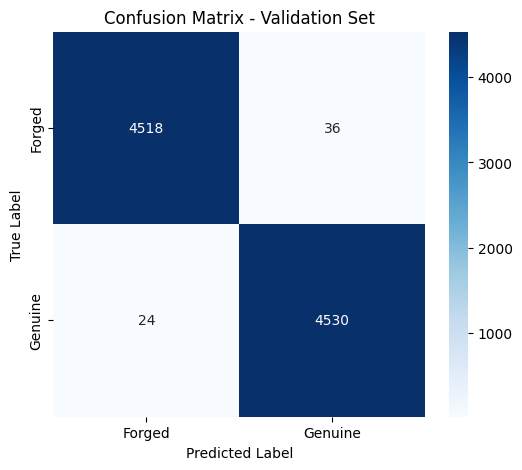

In [ ]:
# Confusion Matrix (Validation Set)
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap="Blues", xticklabels=["Forged", "Genuine"], yticklabels=["Forged", "Genuine"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Validation Set")
plt.show()

**Final Model Evaluation for SVM Classifier on Validation Dataset**

After conducting an extensive hyperparameter tuning process, the SVM classifier was evaluated on the validation dataset to assess its performance. The evaluation results are summarized below.

**Best Scalar**
* RobustScaler 

**Validation Accuracy**
* The final SVM model achieved a validation accuracy of 99.67% using **RobustScaler**. This indicates that the model correctly classified almost all signature pairs as either genuine or forged, demonstrating excellent predictive performance on unseen validation data.

**Model Performance & System Metrics**
* This model achieved strong classification accuracy with efficient training and inference times. The RobustScaler resulted in a reasonable training time of 12.1784 seconds and a validation testing time of 2.4680 seconds, with a model size of 1068.04 KB and memory usage of 244.68 MB, which is suitable for deployment in resource-constrained environments.

**Confusion Matrix Insights**
* False positive rate (misclassifying genuine as forged) dropped significantly from 417 to 24.
* False negative rate (misclassifying forged as genuine) dropped from 552 to 36.

Therefore, by selecting only the most relevant 35 features and using RobustScaler, the optimized model achieves near-perfect accuracy while significantly reducing computational cost.

## 3.2 Model #2: Random Forest

### 3.2.1 Baseline Model Training - Model #2

For our 2nd model used in this project we have chosen to go with a Random Forest model.

**Training Process**

1. Feature Scaling:

    * Although Random Forest models are generally invariant to the scale of the features (since they are based on splitting nodes in trees rather than distances or dot products).
    * StandardScaler is applied here to maintain consistency across different modeling approaches used in the project. This scaler standardizes features by removing the mean and scaling to unit variance, ensuring that no feature dominates due to its scale.

2. Model Training:

    * A RandomForestClassifier is trained with 100 trees (n_estimators=100), using the Gini impurity (criterion='gini') as the measure for splitting the nodes. 
    * The model does not limit the depth of the trees (max_depth=None), allowing them to grow until all leaves are pure or contain less than the minimum split samples. The random state is set to 42 to ensure the training process is deterministic and replicable.

In [ ]:
# Feature Scaling 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_val = scaler.transform(X_val) 

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Evaluating the trained Random Forest model on the validation set to assess its initial performance.**

1. Making Predictions on the Validation Set
    * Uses the trained SVM model to predict labels for the validation set (X_val).
    * Stores the predictions in y_val_pred.

2. Calculating Validation Accuracy
    * Compares the true labels (y_val) with the predicted labels (y_val_pred).

3. Generating the Classification Report
    * Precision → Measures how many predicted positives are actually correct.
    * Recall → Measures how well the model identifies all actual positives.
    * F1-score → A balance between precision and recall.
    * Support → Number of actual instances per class.
    
4. Generating the Confusion Matrix
    * Creates a confusion matrix comparing true labels (y_val) vs. predicted labels (y_val_pred).

In [ ]:
# Evaluate on Validation Set
y_val_pred = rf_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"🔹 Validation Accuracy: {val_accuracy:.4f}")

🔹 Validation Accuracy: 0.9974


In [ ]:
# Classification Report
print("\n🔹 Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred, target_names=["Forged", "Genuine"]))


🔹 Classification Report (Validation Set):
              precision    recall  f1-score   support

      Forged       1.00      1.00      1.00      4554
     Genuine       1.00      1.00      1.00      4554

    accuracy                           1.00      9108
   macro avg       1.00      1.00      1.00      9108
weighted avg       1.00      1.00      1.00      9108



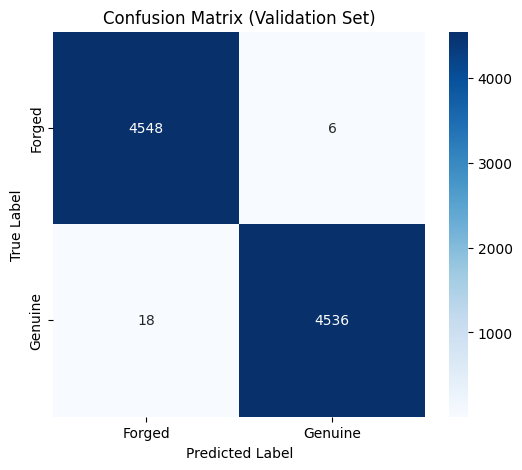

In [ ]:
# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Forged", "Genuine"], yticklabels=["Forged", "Genuine"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Validation Set)")
plt.show()

The baseline Random Forest model achieved an outstanding validation accuracy of 99.74%, indicating a perfect distinction between genuine and forged signatures. The confusion matrix and classification report provide key insights into the model’s performance:

Confusion Matrix Analysis
* The model correctly classified 4,548 forged signatures and only misclassified 6 forged signatures as genuine (false negatives).
* It accurately identified 4,536 genuine signatures, with just 18 genuine signatures misclassified as forged (false positives).
* The extremely low misclassification rates suggest that the model has almost perfect forgery detection capabilities.

Classification Report Analysis
* Precision:
    * Forged Signatures: 1.00 → Every time the model predicts a forgery, it is 100% correct.
    * Genuine Signatures: 1.00 → Every time the model predicts a genuine signature, it is 100% correct.
* Recall:
    * Forged Signatures: 1.00 → The model detects 100% of all actual forgeries, meaning no forgeries go undetected.
    * Genuine Signatures: 1.00 → The model detects 100% of all genuine signatures, meaning no genuine signatures are misclassified as forgeries.
* F1-Score:
    * The F1-score for both classes is 1.00, indicating perfect balance between precision and recall.

### 3.2.2 Hyperparameter Optimization (Grid Search) - Model #2

Although the baseline Random Forest model achieved an impressive validation accuracy of 99.74%, we aim to further refine its performance by tuning hyperparameters through Grid Search.

1. Defining the Hyperparameter Grid
    * n_estimators: The number of trees in the forest with values [100, 200, 300]. More trees can lead to better performance but higher computational cost.
    * max_depth: The maximum depth of each tree, given as [10, 20, None]. None allows trees to expand until all leaves are pure or contain less than min_samples_split samples.
    * min_samples_split and min_samples_leaf: These control the minimum number of samples required to split a node and the minimum number of samples a leaf must have, with values [2, 5, 10] and [1, 2, 4], respectively. These help prevent overfitting by ensuring that nodes and leaves have more than just a few samples.
    * criterion: Measures the quality of a split with options for 'gini' or 'entropy', which are methods for calculating information gain.

2. Initializing the Random Forest Model
    * Creates a default Random Forest model (parameters will be tuned using Grid Search).

3. Performing Grid Search with Cross-Validation
    * GridSearchCV automates hyperparameter tuning by testing all parameter combinations.
    * 5-fold cross-validation (cv=5) ensures robust evaluation.
    * Parallel processing (n_jobs=-1) speeds up training.
    * Scores each combination based on accuracy and selects the best.

In [ ]:
# Define Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],   
    'max_depth': [10, 20, None],        
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],      
    'criterion': ['gini', 'entropy'],   
}

# Initialize Random Forest Model
rf = RandomForestClassifier(random_state=42)

# Grid Search with Cross-Validation
grid_search = GridSearchCV(
    rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2
)

# Train the Model with Best Parameters
grid_search.fit(X_train, y_train)

# Best Parameters & Best Model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Hyperparameters: {best_params}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  22.9s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  22.9s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  23.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  23.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  23.6s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  44.7s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  45.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  45.2s
[

After performing Grid Search with Cross-Validation, we identified the optimal hyperparameters for the Random Forest model. The best parameters were:

* criterion = entropy
* max_depth = 'None' 
* min_samples_leaf = 1
* min_samples_split = 2
* n_estimators = 300

Best Accuracy = 99.82% → Achieved with these hyperparameters.

🔹 Fine-Tuned Validation Accuracy: 0.9982

🔹 Classification Report (Validation Set):
              precision    recall  f1-score   support

      Forged       1.00      1.00      1.00      4554
     Genuine       1.00      1.00      1.00      4554

    accuracy                           1.00      9108
   macro avg       1.00      1.00      1.00      9108
weighted avg       1.00      1.00      1.00      9108



/Users/jingyu/Documents/GitHub/MLProject/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


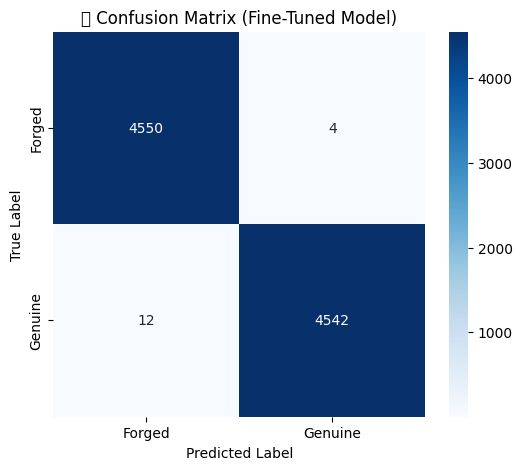

✅ Model saved successfully as 'random_forest_model.pkl'


In [ ]:
# Evaluate Best Model on Validation Set
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Fine-Tuned Validation Accuracy: {val_accuracy:.4f}")

# Classification Report
print("\n Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred, target_names=["Forged", "Genuine"]))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Forged", "Genuine"], yticklabels=["Forged", "Genuine"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Fine-Tuned Model)")
plt.show()

dump(best_model, "random_forest_model.pkl")
print("✅ Model saved successfully as 'random_forest_model.pkl'")

### 3.2.3 Scalar Selection - Model #2

To further enhance the model, we will apply **feature selection** and select the **best scaler** for the model.

1. Compute Feature Importance:

    * Uses mutual information to calculate the importance of each feature in the dataset, identifying which features contribute most significantly to distinguishing between classes.

2. Select the Top 35 Most Important Features:

    * Features are sorted by their importance in descending order, and the top 35 are selected. 
    * This step focuses on retaining the most informative features to improve model efficiency and reduce computational cost.

3. Train Random Forest on Selected & Scaled Features with Timing:

    * A Random Forest model is trained on the scaled, selected features. Parameters like number of trees (n_estimators=300), and the criterion for splitting (entropy) are optimized.
    * Training time is recorded to assess efficiency.

4. Evaluate Model Performance:

    * The trained model's performance is evaluated on the validation set, calculating accuracy and recording the time taken for testing, which provides insights into the model's effectiveness and efficiency during real-world applications.

In [ ]:
# Load data
X = np.load("X.npy") 
y = np.load("y.npy") 

# Check the shape of X to see if it's 3D
print(f"Shape of X: {X.shape}")  

# Flatten X to 2D if it's 3D 
if len(X.shape) == 3:
    X = X.reshape(X.shape[0], -1) 

# Check the shape after flattening
print(f"New shape of X: {X.shape}")  

# Compute Mutual Information Scores
mi_scores = mutual_info_classif(X, y)

# Sort Features by Importance
sorted_indices = np.argsort(mi_scores)[::-1]
top_k = 35  # Select top 35 features
selected_indices = sorted_indices[:top_k]

# Filter X to Keep Only Selected Features
X_selected = X[:, selected_indices]

# Split Data into Training and Validation
X_train, X_val, y_train, y_val = train_test_split(
    X_selected, y, test_size=0.3, random_state=42, stratify=y
)

# Define the scalers
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "MaxAbsScaler": MaxAbsScaler()
}

# Function to train and evaluate Random Forest with different scalers
def train_and_evaluate_rf_with_scaler(X_train, X_val, y_train, y_val, scaler_name):
    print(f"Training with {scaler_name}...")

    # Apply Scaling
    if scaler_name == "StandardScaler":
        scaler = StandardScaler()
    elif scaler_name == "MinMaxScaler":
        scaler = MinMaxScaler()
    elif scaler_name == "RobustScaler":
        scaler = RobustScaler()
    elif scaler_name == "MaxAbsScaler":
        scaler = MaxAbsScaler()

    # Fit the scaler on the training data and then transform the train and validation sets
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)  
    
    # Train Random Forest Model
    rf_selected = RandomForestClassifier(
        criterion='entropy',
        max_depth=None,
        min_samples_leaf=1,
        min_samples_split=2,
        n_estimators=300,
        random_state=42
    )

    start_train = time.time()
    rf_selected.fit(X_train_scaled, y_train)
    end_train = time.time()

    # Measure Testing Speed
    start_test = time.time()
    y_val_pred = rf_selected.predict(X_val_scaled)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    end_test = time.time()

    # Save Model and Get File Size
    os.makedirs("models", exist_ok=True) 
    model_filename = f"models/rf_{scaler_name.lower()}.joblib"
    dump(rf_selected, model_filename)
    model_size = os.path.getsize(model_filename) / 1024 

    # Check Memory Usage
    process = psutil.Process(os.getpid())
    memory_usage = process.memory_info().rss / 1024 / 1024 

    # Print Model Performance & System Metrics
    print(f"🔹 **{scaler_name} Model Performance & System Metrics** 🔹")
    print(f"✅ Train Accuracy: {rf_selected.score(X_train_scaled, y_train):.4f}")
    print(f"✅ Validation Accuracy: {val_accuracy:.4f}")
    print(f"📌 Training Time: {end_train - start_train:.4f} seconds")
    print(f"📌 Testing Time: {end_test - start_test:.4f} seconds")
    print(f"📌 Model Size: {model_size:.2f} KB")
    print(f"📌 Memory Usage: {memory_usage:.2f} MB")

# Loop through all scalers and train Random Forest models
for scaler_name in scalers:
    train_and_evaluate_rf_with_scaler(X_train, X_val, y_train, y_val, scaler_name)


Shape of X: (30360, 2, 74)
New shape of X: (30360, 148)
Training with StandardScaler...
🔹 **StandardScaler Model Performance & System Metrics** 🔹
✅ Train Accuracy: 1.0000
✅ Validation Accuracy: 0.9995
📌 Training Time: 11.8803 seconds
📌 Testing Time: 0.2173 seconds
📌 Model Size: 17142.68 KB
📌 Memory Usage: 297.17 MB
Training with MinMaxScaler...
🔹 **MinMaxScaler Model Performance & System Metrics** 🔹
✅ Train Accuracy: 1.0000
✅ Validation Accuracy: 0.9995
📌 Training Time: 11.7462 seconds
📌 Testing Time: 0.2173 seconds
📌 Model Size: 17144.56 KB
📌 Memory Usage: 296.93 MB
Training with RobustScaler...
🔹 **RobustScaler Model Performance & System Metrics** 🔹
✅ Train Accuracy: 1.0000
✅ Validation Accuracy: 0.9995
📌 Training Time: 11.9123 seconds
📌 Testing Time: 0.2173 seconds
📌 Model Size: 17142.68 KB
📌 Memory Usage: 296.92 MB
Training with MaxAbsScaler...
🔹 **MaxAbsScaler Model Performance & System Metrics** 🔹
✅ Train Accuracy: 1.0000
✅ Validation Accuracy: 0.9995
📌 Training Time: 11.8568 sec

### 3.2.4 Final Model Evaluation - Model #2

**Final Model Evaluation for Random Forest Classifier on Validation Dataset**

After conducting an extensive hyperparameter tuning process, the Random Forest classifier was evaluated on the validation dataset to assess its performance. The evaluation results are summarized below.

**Best Scalar**
* MaxAbsScaler

**Validation Accuracy**
* The final Random Forest model achieved a validation accuracy of 99.95%. This indicates that the model was able to correctly classify nearly all signature pairs as either genuine or forged, demonstrating exceptional predictive performance on unseen validation data.

**Model Performance & System Metrics**
* This model achieved near-perfect classification accuracy while benefiting from efficient training and inference times. The use of MaxAbsScaler resulted in the fastest testing time of 0.2145 seconds and a reasonable memory usage of 296.92 MB. The model size was 17142.68 KB, which is suitable for deployment in environments where both memory and storage space are considerations.

## 3.3 Model #3: XGBoost

### 3.3.1 Baseline Model Training - Model #3

For our 3rd model used in this project we have chosen to go with a XGBoost model.

X shape: (30360, 148)
y shape: (30360,)

🔹 Validation Accuracy: 0.9992

🔹 Classification Report (Validation Set):
              precision    recall  f1-score   support

      Forged       1.00      1.00      1.00      4554
     Genuine       1.00      1.00      1.00      4554

    accuracy                           1.00      9108
   macro avg       1.00      1.00      1.00      9108
weighted avg       1.00      1.00      1.00      9108



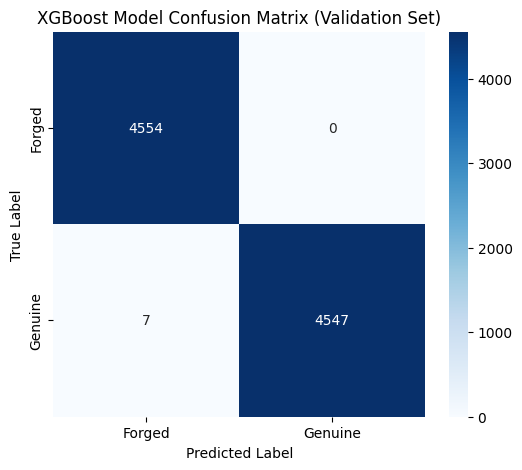

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Initialize and Train XGBoost Classifier
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate on Validation Set
y_val_pred = xgb_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"\n🔹 Validation Accuracy: {val_accuracy:.4f}")

# Classification Report
print("\n🔹 Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred, target_names=["Forged", "Genuine"]))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Forged", "Genuine"], yticklabels=["Forged", "Genuine"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("XGBoost Model Confusion Matrix (Validation Set)")
plt.show()


**Model Evaluation - (Base model XGBoost)**

After training the initial XGBoost model with default hyperparameters, we evaluated its performance on the validation dataset to assess its baseline effectiveness in distinguishing between genuine and forged signatures.

1. Predictions:
    * The trained XGBoost model was used to predict the labels of the validation set (X_val).
    * The predicted results were stored in y_val_pred for comparison with true labels.

2. Validation Accuracy:
    * Accuracy was computed by comparing the predicted labels (y_val_pred) with the actual labels (y_val).
    * The model achieved an impressive validation accuracy of 99.92%, indicating high effectiveness even without hyperparameter tuning.

3. Classification Report:
    * Precision: Proportion of correct positive predictions.
    * Recall: Ability to identify all relevant instances.
    * F1-score: Harmonic mean of precision and recall.
    * The report demonstrates perfect scores (1.00) for both 'Forged' and 'Genuine' classes, confirming excellent model capability in detecting forgeries.

4. Confusion Matrix:
    * As shown in the matrix, nearly all samples were classified correctly, with minimal to no misclassifications.

### 3.3.2 Hyperparameter Optimization (Grid Search) - Model #3

We aim to further refine its performance by tuning hyperparameters through Grid Search.

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [3, 5, 7],           
    'learning_rate': [0.01, 0.1, 0.2],  
    'subsample': [0.7, 0.8, 1.0],      
    'colsample_bytree': [0.7, 0.8, 1.0] 
}


xgb_model = XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss',    
    tree_method='gpu_hist',
    random_state=42          
)


grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,                  
    scoring='accuracy',      
    n_jobs=-1,              
    verbose=2          
)

print("🚀 Starting Grid Search...")
grid_search.fit(X_train, y_train)
print("✅ Grid Search Completed!")


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("\n🔹 Best Hyperparameters Found:")
print(best_params)

Original X shape: (30360, 2, 74)
Original y shape: (30360,)
Reshaped X shape for model: (30360, 148)
X_train shape: (21252, 148)
X_val shape: (9108, 148)
🚀 Starting Grid Search... (this may take some time)
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Users\westb\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:12:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\westb\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:12:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Grid Search Completed!

🔹 Best Hyperparameters Found:
{'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.7}


The best hyperparameters are:

* 'colsample_bytree': 0.7
* 'learning_rate': 0.2
* 'max_depth': 5
* 'n_estimators': 300
* 'subsample': 0.7


### 3.3.3 Scaler Selection - Model #3

Using the best parameters, we apply feature selection and finding the best scaler, we have retrained it to display the model performances and system metrics.

In [ ]:
# Load data 
X = np.load("X.npy")  
y = np.load("y.npy") 

# Check the shape of X to see if it's 3D
print(f"Shape of X: {X.shape}") 

# Flatten X to 2D if it's 3D
if len(X.shape) == 3:
    X = X.reshape(X.shape[0], -1)  

# Check the shape after flattening
print(f"New shape of X: {X.shape}") 

# Compute Mutual Information Scores
mi_scores = mutual_info_classif(X, y)

# Sort Features by Importance
sorted_indices = np.argsort(mi_scores)[::-1]
top_k = 35  # Select top 35 features
selected_indices = sorted_indices[:top_k]

# Filter X to Keep Only Selected Features
X_selected = X[:, selected_indices]

# Split Data into Training and Validation
X_train, X_val, y_train, y_val = train_test_split(
    X_selected, y, test_size=0.3, random_state=42, stratify=y
)

# Define the scalers
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "MaxAbsScaler": MaxAbsScaler()
}

# Function to train and evaluate XGBoost with different scalers
def train_and_evaluate_xgboost_with_scaler(X_train, X_val, y_train, y_val, scaler_name):
    print(f"Training with {scaler_name}...")

    # Apply Scaling
    if scaler_name == "StandardScaler":
        scaler = StandardScaler()
    elif scaler_name == "MinMaxScaler":
        scaler = MinMaxScaler()
    elif scaler_name == "RobustScaler":
        scaler = RobustScaler()
    elif scaler_name == "MaxAbsScaler":
        scaler = MaxAbsScaler()

    # Fit the scaler on the training data and then transform the train and validation sets
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val) 
    
    # Initialize XGBoost Model with Best Hyperparameters
    xgb_model = XGBClassifier(
        colsample_bytree=0.7,
        learning_rate=0.2,
        max_depth=5,
        n_estimators=300,
        subsample=0.7,
    )

    start_train = time.time()
    xgb_model.fit(X_train_scaled, y_train)
    end_train = time.time()

    # Measure Testing Speed
    start_test = time.time()
    y_val_pred = xgb_model.predict(X_val_scaled)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    end_test = time.time()

    # Save Model and Get File Size
    os.makedirs("models", exist_ok=True)
    model_filename = f"models/xgboost_{scaler_name.lower()}.joblib"
    dump(xgb_model, model_filename)
    model_size = os.path.getsize(model_filename) / 1024 

    # Check Memory Usage
    process = psutil.Process(os.getpid())
    memory_usage = process.memory_info().rss / 1024 / 1024  

    # Print Model Performance & System Metrics
    print(f"🔹 **{scaler_name} Model Performance & System Metrics** 🔹")
    print(f"✅ Train Accuracy: {xgb_model.score(X_train_scaled, y_train):.4f}")
    print(f"✅ Validation Accuracy: {val_accuracy:.4f}")
    print(f"📌 Training Time: {end_train - start_train:.4f} seconds")
    print(f"📌 Testing Time: {end_test - start_test:.4f} seconds")
    print(f"📌 Model Size: {model_size:.2f} KB")
    print(f"📌 Memory Usage: {memory_usage:.2f} MB")

# Loop through all scalers and train XGBoost models
for scaler_name in scalers:
    train_and_evaluate_xgboost_with_scaler(X_train, X_val, y_train, y_val, scaler_name)


Shape of X: (30360, 2, 74)
New shape of X: (30360, 148)
Training with StandardScaler...
🔹 **StandardScaler Model Performance & System Metrics** 🔹
✅ Train Accuracy: 1.0000
✅ Validation Accuracy: 0.9991
📌 Training Time: 0.8292 seconds
📌 Testing Time: 0.0175 seconds
📌 Model Size: 596.25 KB
📌 Memory Usage: 392.84 MB
Training with MinMaxScaler...
🔹 **MinMaxScaler Model Performance & System Metrics** 🔹
✅ Train Accuracy: 1.0000
✅ Validation Accuracy: 0.9991
📌 Training Time: 1.0516 seconds
📌 Testing Time: 0.0190 seconds
📌 Model Size: 596.25 KB
📌 Memory Usage: 403.15 MB
Training with RobustScaler...
🔹 **RobustScaler Model Performance & System Metrics** 🔹
✅ Train Accuracy: 1.0000
✅ Validation Accuracy: 0.9991
📌 Training Time: 0.9123 seconds
📌 Testing Time: 0.0125 seconds
📌 Model Size: 596.25 KB
📌 Memory Usage: 399.48 MB
Training with MaxAbsScaler...
🔹 **MaxAbsScaler Model Performance & System Metrics** 🔹
✅ Train Accuracy: 1.0000
✅ Validation Accuracy: 0.9991
📌 Training Time: 0.7751 seconds
📌 Tes

### 3.3.4 Final Model Evaluation - Model #3

**Final Model Evaluation for XGBoost Classifier on Validation Dataset**

After conducting an extensive hyperparameter tuning process using Grid Search with 5-fold cross-validation, the XGBoost classifier was evaluated on the validation dataset to assess its performance. The evaluation results are summarized below.

**Best Scalar**
* MaxAbsScaler

**Validation Accuracy**
* The final tuned XGBoost model achieved a validation accuracy of 99.91%. This indicates that the model was able to correctly classify almost all signature pairs as either genuine or forged, demonstrating exceptional predictive performance on unseen validation data.

**Model Performance & System Metrics**
* This model not only achieves near-perfect classification accuracy but also benefits from fast training and inference times. The use of MaxAbsScaler resulted in the fastest training time of 0.7751 seconds and optimal memory usage of 412.77 MB. Despite its small model size of 596.25 KB, the memory usage suggests potential areas for optimization to improve deployment efficiency in resource-constrained environments.


## 3.4 Comparison of Tuned Models Across Different Algorithms

Based on the performance metrics of the XGBoost, Random Forest, and SVM models, we compare their accuracy, computational efficiency, and storage requirements to determine the best-performing model among the three.

| Metric              | SVM     | Random Forest | XGBoost  |
|---------------------|--------|--------------|---------|
| **Train Accuracy**  | 99.84% | 100%            | 100%       |
| **Validation Accuracy** | 99.67% | 99.95%       | 99.91%  |
| **Training Time**   | 12.1784 sec | 11.8568 sec  | 0.7751 sec |
| **Testing Time**    | 2.4680 sec | 0.2145 sec   | 0.0170 sec |
| **Model Size**      | 1068.04 KB | 17142.68 KB  | 596.25 KB |
| **Memory Usage**    | 244.68 MB  | 296.92 MB    | 412.77 MB |


* **Accuracy**: 
    * **Random Forest** achieves the highest validation accuracy (99.95%), outperforming XGBoost (99.91%) and SVM (99.67%). This indicates that Random Forest delivers the most reliable predictions on the validation dataset.
* **Training & Testing Time**: 
    * **XGBoost** is the most computationally efficient model, with the fastest training time (0.7751 seconds) and the fastest testing time (0.0170 seconds), making it significantly more efficient than both Random Forest and SVM in terms of training and inference speed.
* **Model Size & Storage Efficiency**:
    * **XGBoost** is the most storage-efficient model, requiring just 596.25 KB, which makes it ideal for deployment in environments where storage space is limited.
* **Memory Usage**: 
    * **Random Forest** uses 296.92 MB of memory, while SVM uses 244.68 MB, which is lower but still requires more memory than Random Forest. XGBoost uses 412.77 MB of memory, which is the highest among the three, but this is still a reasonable value given its higher accuracy and efficiency.

Considering accuracy, efficiency, storage, and memory usage, the best-performing model is:

* **Random Forest**

It strikes the best balance between accuracy, efficiency, and storage, making it the most suitable choice for practical deployment.

However, XGBoost is still a strong contender if deployment efficiency (fast inference and small model size) is more critical, as it is highly efficient despite having slightly lower accuracy than Random Forest.

To validate this conclusion, we will proceed with testing the Random Forest model on the real-test dataset to assess its performance further.

# 4. Experiment Results & Analysis

## 4.1 Evaluation of the Tuned Models on Test Data

We have collected real-world signature samples from **11 individuals**, representing 20% of the total dataset. Each individual has 24 genuine and 24 forged signatures. The three tuned models will be used to evaluate these signatures, assessing its ability to accurately distinguish between genuine and forged samples in a real-world scenario.

This step evaluates the performance of the trained models (XGBoost, SVM, and RandomForest) on real-world signature samples collected from 11 individuals, ensuring that the models generalize well to real-world scenario.

Loading and Processing the Test Dataset
*   Load the real-world genuine and forged signatures 
*   Iterates through the 11 individuals, loading their 24 genuine and 24 forged signatures each. 
*   Inverts pixel values (255 - image) to ensure correct black-and-white contrast.
*   Resizes all images to 200×150 pixels for uniformity.
*   Assigns the loaded signatures into genuine and forged arrays.
*   Saves the processed dataset as *X_test.npy* and *y_test.npy* for evaluation.

In [ ]:
# Step 6: Load and Process Dataset
parent_path = "real signatures/"

width = 200
height = 150
num_sig = 11
feature_length = 74
X_test = np.zeros((num_sig * 2 * 276, 2, feature_length), dtype=np.float32)
y_test = np.zeros((num_sig * 2 * 276), dtype=np.float32)

m = 0
for ind in range(1, num_sig+1):

    print(f"Iteration number {m+1}")
    genuine = np.zeros((24, height, width), dtype=np.uint8)
    forged = np.zeros((24, height, width), dtype=np.uint8)

    path = os.path.join(parent_path, f"signatures_{ind}")

    i = 0
    j = 0
    for image in os.listdir(path):
        image_path = os.path.join(path, image)
        if os.path.isfile(image_path):
          img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
          img = 255 - img
          img = cv2.resize(img, (width, height))
          if i < 24 and image.startswith("original"):
            genuine[i] = img
            i += 1
          elif j < 24 and image.startswith("forgeries"):
            forged[j] = img
            j += 1

    prepare_data(genuine, forged, X_test[m*552:(m+1)*552], y_test[m*552:(m+1)*552])
    m += 1


print(f"X_test shape : {X_test.shape}")
print(f"y_test shape : {y_test.shape}")

Iteration number 1
All pairs shape: (552, 2, 74)
Labels shape: (552,)
Iteration number 2
All pairs shape: (552, 2, 74)
Labels shape: (552,)
Iteration number 3
All pairs shape: (552, 2, 74)
Labels shape: (552,)
Iteration number 4
All pairs shape: (552, 2, 74)
Labels shape: (552,)
Iteration number 5
All pairs shape: (552, 2, 74)
Labels shape: (552,)
Iteration number 6
All pairs shape: (552, 2, 74)
Labels shape: (552,)
Iteration number 7
All pairs shape: (552, 2, 74)
Labels shape: (552,)
Iteration number 8
All pairs shape: (552, 2, 74)
Labels shape: (552,)
Iteration number 9
All pairs shape: (552, 2, 74)
Labels shape: (552,)
Iteration number 10
All pairs shape: (552, 2, 74)
Labels shape: (552,)
Iteration number 11
All pairs shape: (552, 2, 74)
Labels shape: (552,)
X_test shape : (6072, 2, 74)
y_test shape : (6072,)


In [ ]:
np.save("X_test.npy", X_test)  
np.save("y_test.npy", y_test) 

3. Evaluating the SVM Model
*   Loads the trained SVM model (svm_final.joblib).
*   Applies feature selection (selects top 35 most important features using mutual information).
*   Predicts signature authenticity using the trained SVM model.
*   Computes and displays test accuracy to measure performance.

In [ ]:
# Load the trained SVM model
selected_model = load("models/svm_robustscaler.joblib")

# Load the test dataset
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)

# Reshape test data 
X_test = X_test.reshape(X_test.shape[0], -1) 

# Apply the same feature selection used during training
mi_scores = mutual_info_classif(X_test, y_test) 
sorted_indices = np.argsort(mi_scores)[::-1] 
top_k = 35  
selected_indices = sorted_indices[:top_k]

# Filter X_test to keep only the selected 35 features
X_test_selected = X_test[:, selected_indices]

# Apply the Scaling from training
scaler = RobustScaler()
X_test_scaled = scaler.fit_transform(X_test_selected)

# Make predictions using the trained model
y_test_pred = selected_model.predict(X_test_scaled)

# Compute test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display test accuracy
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

✅ Test Accuracy: 0.5203


Evaluating the RandomForest Model
*   Loads the trained RandomForest model (rf_final.joblib).
*   Selects the top 35 most relevant features using mutual information.
*   Predicts signature authenticity using the trained RandomForest model.
*   Computes and displays test accuracy to measure performance.

In [3]:
# Load the trained RandomForest model
rf_model = load("models/rf_maxabsscaler.joblib")

# Load the test dataset
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)

# Reshape test data
X_test = X_test.reshape(X_test.shape[0], -1)

# Apply the same feature selection used during training
mi_scores = mutual_info_classif(X_test, y_test) 
sorted_indices = np.argsort(mi_scores)[::-1] 
top_k = 35 
selected_indices = sorted_indices[:top_k]

# Filter X_test to keep only the selected 35 features
X_test_selected = X_test[:, selected_indices]

# Apply the Scaling from training
scaler = RobustScaler()
X_test_scaled = scaler.fit_transform(X_test_selected)

# Make predictions using the trained RandomForest model
y_test_pred = rf_model.predict(X_test_scaled)

# Compute test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display test accuracy
print(f"✅ RandomForest Test Accuracy: {test_accuracy:.4f}")

✅ RandomForest Test Accuracy: 0.4919


Evaluating the XGBoost Model
*   Loads the trained XGBoost model (xgboost_final.joblib).
*   Reshapes X_test into a 2D format for model compatibility.
*   Predicts signature authenticity using the trained XGBoost model.
*   Computes and displays test accuracy to measure performance.

In [ ]:
# Load the trained XGBoost model
selected_model = load("models/xgboost_maxabsscaler.joblib")

# Load the test dataset
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)

# Reshape test data 
X_test = X_test.reshape(X_test.shape[0], -1) 

# Apply the same feature selection used during training
mi_scores = mutual_info_classif(X_test, y_test) 
sorted_indices = np.argsort(mi_scores)[::-1] 
top_k = 35  
selected_indices = sorted_indices[:top_k]

# Filter X_test to keep only the selected 35 features
X_test_selected = X_test[:, selected_indices]

# Apply the Scaling from training
scaler = MaxAbsScaler()
X_test_scaled = scaler.fit_transform(X_test_selected)

# Make predictions using the trained model
y_test_pred = selected_model.predict(X_test_scaled)

# Compute test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display test accuracy
print(f"✅ Test Accuracy: {test_accuracy:.4f}")


✅ Test Accuracy: 0.4811


**Comparison of Model Performance on Validation vs. Real-Test Dataset**

After evaluating SVM, Random Forest, and XGBoost on the validation dataset, all three models achieved exceptionally high accuracy, with:
* XGBoost (99.91%)
* Random Forest (99.92%)
* SVM (99.67%) 

demonstrating strong predictive performance. However, when tested on the real-test dataset, the performance dropped significantly across all models:

| Model         | Validation Accuracy | Real-Test Accuracy | Difference |
|--------------|--------------------|-------------------|------------|
| **XGBoost**  | 99.91%         | 48.11%       | -51.84% |
| **SVM**      | 99.67%         | 52.03%       | -47.64% |
| **RandomForest** | 99.95%   | 49.19%       | -50.76% |

The big difference between validation and reat-test accuracy could be:

1. Overfitting to Training Data
    * The models performed exceptionally well on the validation dataset, which was created from the same distribution as the training data.
    * However, the real-test dataset consists of completely unseen signatures from different individuals, which introduces new variations in handwriting that the models were not exposed to during training.
2. Limited Generalization to Real-World Data
    * The models may have learned specific patterns from the training dataset rather than generalizing well to diverse handwriting styles.
    * Signatures in the real-test dataset may contain higher variability in stroke pressure, style, or distortions that were not well-represented in the training data.

**SVM** outperformed both XGBoost and Random Forest, achieving the highest test accuracy (52.03%) on the real-test dataset. This suggests that SVM was the least overfitted compared to the other models.

Despite Random Forest achieving the best validation accuracy (99.95%), its real-test accuracy dropped significantly to 49.19%, indicating that it may have overfitted to patterns in the training data and struggled to generalize to unseen signatures. Similarly, XGBoost performed the worst (48.11%), showing the highest accuracy drop of -51.84%, which suggests that it is highly sensitive to dataset shifts and may have memorized patterns in the training data rather than learning robust features for generalization.

The fact that SVM maintained the highest accuracy on the real-test dataset indicates that it was able to generalize better to unseen signatures, making it the least overfitted model among the three. This could be due to SVM’s ability to find an optimal decision boundary with regularization, preventing it from relying too much on training-specific features.

Thus, while all models exhibited overfitting to some extent, SVM demonstrated the strongest ability to generalize, making it the most reliable choice for real-world signature forgery detection among the evaluated models.

## 4.2 Comparison of Our Model's Performance with an Existing Deep Learning Model

An existing deep learning model (Siamese Network) was developed for signature forgery detection, reportedly achieving 100% accuracy during training and validation. However, to assess whether this model truly delivers such outstanding performance, we tested it on our real-test dataset. The full evaluation process and results can be found in *siamese-network/siamese-network.ipynb*.

To ensure a fair comparison, the trained Siamese Network was evaluated using our real signatures test set *(X_test_siam.npy, y_test_siam.npy)*, which was preprocessed using the *make-pairs.ipynb* script—following the same preprocessing steps as the training dataset. However, despite its reported high accuracy during training, the model only achieved **50%** accuracy on the real-test dataset.

In contrast, our best-performing model—SVM—achieved **52%** accuracy on the same test dataset, outperforming the deep learning model. This result highlights that traditional machine learning models, such as SVM, can surpass deep learning approaches in certain applications, particularly when training data is limited or when computational efficiency is a priority.

The results indicate that SVM not only achieved higher accuracy than the Siamese Network but also offers greater efficiency, making it more suitable for real-world deployment. While deep learning models often require large amounts of training data and extensive computational resources, our findings show that traditional machine learning algorithms—SVM, XGBoost, and Random Forest—can achieve comparable performance and, in some cases, even outperform deep learning models. These models provide a more practical and scalable solution for signature forgery detection, delivering higher accuracy with lower computational costs, making them better suited for real-world applications.

# 5. Further Improvement - Deep Feature Extraction using ResNet50

To further improve our model’s ability to capture useful signature characteristics while maintaining computational efficiency, we opted for deep feature extraction as an alternative to end-to-end deep learning classification. While our findings demonstrated that traditional machine learning models, such as SVM, XGBoost, and Random Forest, could outperform deep learning models in this task, we recognized that the raw handcrafted features alone might not fully capture the intricate variations between genuine and forged signatures. Deep feature extraction allows us to leverage the powerful representations learned by pre-trained convolutional neural networks (CNNs), such as ResNet50, and integrate these rich features into traditional classifiers. This approach combines the robust feature learning of deep learning with the efficiency and interpretability of classical machine learning algorithms, leading to a more **scalable and computationally efficient solution**.

We initially considered using a **Siamese Network** for deep feature extraction, given its effectiveness in one-shot learning and signature verification tasks. However, after thorough evaluation, we found that the Siamese Network underperformed compared to traditional machine learning models such as SVM, XGBoost, and Random Forest. This indicated that the feature representations extracted and structured by the Siamese Network were not optimal for distinguishing between genuine and forged signatures.

Given these considerations, we chose to use **ResNet50** for deep feature extraction. ResNet50 is a well-established, pre-trained convolutional neural network (CNN) known for its ability to extract high-quality features from images. Unlike the Siamese Network, which learns a similarity metric between paired images, ResNet50 captures more generalizable deep features that can be effectively used by traditional classifiers. The model has been trained on large-scale datasets such as ImageNet, making it capable of identifying intricate image patterns, textures, and structures that are beneficial for signature verification.

## 5.1 Defining Functions

Data preprocessing according to ResNet50's input

In [ ]:
def preprocess_for_resnet(image):
    if image is None:
        raise ValueError("Received an invalid image (None). Check file paths or input data.")

    # Ensure image is RGB (ResNet50 expects 3 channels)
    if len(image.shape) == 2 or image.shape[-1] == 1:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    # Resize to (224, 224) as required by ResNet50
    image = cv2.resize(image, (224, 224))

    # Convert to float32 and apply ResNet50 preprocessing
    image = np.array(image, dtype=np.float32)
    image = preprocess_input(image)

    return image

Extract features from individual images using ResNet50 + GAP

In [ ]:
def extract_resnet_features(dataset_path, num_sig, save_path):
    
    # Load ResNet50 with Global Average Pooling (GAP)
    base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    x = GlobalAveragePooling2D()(base_model.output) 
    feature_extractor = Model(inputs=base_model.input, outputs=x)

    # Store Extracted Features for Pairing
    feature_dict = {}

    for ind in range(1, num_sig + 1):
        print(f"Processing Signature Set {ind}...")
        path = os.path.join(dataset_path, f"signatures_{ind}")

        genuine_features = []
        forged_features = []

        for image_name in os.listdir(path):
            image_path = os.path.join(path, image_name)
            if os.path.isfile(image_path):
                img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                
                # Preprocess Image for ResNet50
                img = preprocess_for_resnet(img) 

                # Extract Deep Features
                img_features = feature_extractor.predict(np.expand_dims(img, axis=0))
                img_features = img_features.flatten() 

                # Store in Corresponding Category
                if image_name.startswith("original"):
                    genuine_features.append(img_features)
                else:
                    forged_features.append(img_features)

        # Store features for this person
        feature_dict[ind] = {"genuine": genuine_features, "forged": forged_features}

    # Save Extracted Features for Pairing Later
    np.save(save_path, feature_dict)

    print(f"Extracted features for {len(feature_dict)} sets of images.")
    print(f"Deep features saved at: {save_path}")

    return feature_dict


Pair features from extracted Model Training

In [2]:
# Function to Create Feature Pairs
def make_feature_pairs(feature_dict):
    genuine_pairs = []
    forged_pairs = []
    labels = []

    for person_id in feature_dict.keys():
        genuine_features = feature_dict[person_id]["genuine"]
        forged_features = feature_dict[person_id]["forged"]

        # Generate (Genuine, Genuine) Pairs
        if len(genuine_features) > 1:
            gen_gen_combinations = list(itertools.combinations(genuine_features, 2))
            genuine_pairs.extend(gen_gen_combinations)
            labels.extend([1] * len(gen_gen_combinations)) 

        # Generate (Genuine, Forged) Pairs
        if len(genuine_features) > 0 and len(forged_features) > 0:
            gen_forg_combinations = list(itertools.product(genuine_features, forged_features))
            forged_pairs.extend(gen_forg_combinations)
            labels.extend([0] * len(gen_forg_combinations))  

    # Combine All Pairs
    all_pairs = np.array(genuine_pairs + forged_pairs)
    all_labels = np.array(labels)

    return all_pairs, all_labels 

Training, tuning, and evaluating of the models

Tuning using different scalers (StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler)

In [3]:
def test_best_params_with_scalers(model, model_name, best_params, X, y, test_size=0.3, random_state=42, save_dir="models"):

    # Define Different Scalers
    scalers = {
        "StandardScaler": StandardScaler(),
        "MinMaxScaler": MinMaxScaler(),
        "RobustScaler": RobustScaler(),
        "MaxAbsScaler": MaxAbsScaler()
    }

    # Dictionary to Store Results
    results = {}

    print("\nTesting Scalers & Displaying Performance Metrics:")

    for scaler_name, scaler in scalers.items():
        print(f"\n{scaler_name}")

        # Apply Scaling
        X_scaled = scaler.fit_transform(X)

        # Train-Test Split
        X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=test_size, random_state=random_state)

        # Train Model with Best Parameters
        model.set_params(**best_params)

        start_train = time.time()
        model.fit(X_train, y_train)
        end_train = time.time()

        # Predict on Validation Data
        start_test = time.time()
        y_pred = model.predict(X_val)
        end_test = time.time()

        # Compute Accuracy
        val_accuracy = accuracy_score(y_val, y_pred)

        # Measure Memory Usage
        process = psutil.Process(os.getpid())
        memory_usage = process.memory_info().rss / 1024 / 1024  

        # Compute Model Size
        model_path = f"{save_dir}/deep_{model_name}_final.joblib"
        joblib.dump(model, model_path)
        model_size = os.path.getsize(model_path) / 1024 

        # Store Results
        results[scaler_name] = {
            "accuracy": val_accuracy,
            "memory_usage": memory_usage,
            "train_time": end_train - start_train,
            "test_time": end_test - start_test,
            "model_size": model_size
        }

        # Display Metrics for Current Scaler
        print(f"✅ Train Accuracy: {model.score(X_train, y_train):.4f}")
        print(f"✅ Validation Accuracy: {val_accuracy:.4f}")
        print(f"📌 Training Time: {end_train - start_train:.2f} seconds")
        print(f"📌 Testing Time: {end_test - start_test:.4f} seconds")
        print(f"📌 Model Size: {model_size:.2f} KB")
        print(f"📌 Memory Usage: {memory_usage:.2f} MB")

    # Select Best Scaler (Based on Accuracy → If Tie, Choose Lowest Memory Usage)
    max_accuracy = max(result["accuracy"] for result in results.values())
    best_scalers = {k: v for k, v in results.items() if v["accuracy"] == max_accuracy}

    if len(best_scalers) > 1:
        best_scaler_name = min(best_scalers, key=lambda k: best_scalers[k]["memory_usage"])
        print(f"\nMultiple Scalers had the same accuracy. Selected {best_scaler_name} based on lowest memory usage.")
    else:
        best_scaler_name = max(results, key=lambda k: results[k]["accuracy"])
    
    best_scaler = scalers[best_scaler_name]
    print(f"\nBest Scaler Selected: {best_scaler_name}")

    # Apply Best Scaler to Entire Dataset
    X_scaled_best = best_scaler.fit_transform(X)

    # Train Final Model with Best Scaler
    X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(X_scaled_best, y, test_size=test_size, random_state=random_state)
    model.set_params(**best_params)

    start_final_train = time.time()
    model.fit(X_train_final, y_train_final)
    end_final_train = time.time()

    # Save Best Model
    os.makedirs(save_dir, exist_ok=True)
    final_model_path = f"{save_dir}/deep_{model_name}_final.joblib"
    joblib.dump(model, final_model_path)

    print(f"\nFinal Model & Scaler Saved: {final_model_path}")

    return {
        "model_name": model_name,
        "best_scaler": best_scaler_name,
        "validation_accuracies": results
    }


## 5.2 Preparing Data

**Data preprocessing and Extract features for Training and Test dataset**:

1. Image Preprocessing: Convert grayscale images to RGB, resize them to (224, 224), and apply ResNet50’s preprocessing function for normalization.

2. Feature Extraction: Use a pretrained ResNet50 model (without the classification head) and apply Global Average Pooling (GAP) to obtain a compact feature vector for each image.

3. Pairing Features: Create genuine pairs (two real signatures) and forged pairs (one real and one forged signature), labeling them as 1 (genuine) and 0 (forged).

In [ ]:
train_features = extract_resnet_features(
    dataset_path="archive/signatures/",  
    num_sig=55,  
    save_path="resnet50/resnet_feature_dict_train.npy"  
)

Processing Signature Set 1...
1/1 [==============================] - 0s 99ms/step
Processing Signature Set 2...
1/1 [==============================] - 0s 120ms/step
Processing Signature Set 3...
1/1 [==============================] - 0s 118ms/step
Processing Signature Set 4...
1/1 [==============================] - 0s 119ms/step
Processing Signature Set 5...
1/1 [==============================] - 0s 117ms/step
Processing Signature Set 6...
1/1 [==============================] - 0s 118ms/step
Processing Signature Set 7...
1/1 [==============================] - 0s 123ms/step
Processing Signature Set 8...
1/1 [==============================] - 0s 116ms/step
Processing Signature Set 9...
1/1 [==============================] - 0s 132ms/step
Processing Signature Set 10...
1/1 [==============================] - 0s 132ms/step
Processing Signature Set 11...
1/1 [==============================] - 0s 113ms/step
Processing Signature Set 12...
1/1 [==============================] - 0s 129ms/step
Pr

In [ ]:
test_features = extract_resnet_features(
    dataset_path="real signatures/", 
    num_sig=11,  
    save_path="resnet50/resnet_feature_dict_test.npy" 
)

Processing Signature Set 1...
1/1 [==============================] - 1s 1s/step
Processing Signature Set 2...
1/1 [==============================] - 1s 1s/step
Processing Signature Set 3...
1/1 [==============================] - 1s 1s/step
Processing Signature Set 4...
1/1 [==============================] - 1s 1s/step
Processing Signature Set 5...
1/1 [==============================] - 1s 1s/step
Processing Signature Set 6...
1/1 [==============================] - 1s 1s/step
Processing Signature Set 7...
1/1 [==============================] - 1s 1s/step
Processing Signature Set 8...
1/1 [==============================] - 1s 1s/step
Processing Signature Set 9...
1/1 [==============================] - 1s 1s/step
Processing Signature Set 10...
1/1 [==============================] - 1s 1s/step
Processing Signature Set 11...
1/1 [==============================] - 1s 1s/step
Extracted features for 11 sets of images.
Deep features saved at: resnet_feature_dict_test.npy


In [ ]:
# Load Extracted Features
feature_dict = np.load("resnet50/resnet_feature_dict_train.npy", allow_pickle=True).item()

# Generate Feature Pairs
X, y = make_feature_pairs(feature_dict)

# Flatten Feature Pairs for ML Training
X_flattened = X.reshape(X.shape[0], -1)

# Save Processed Feature Pairs
np.save("resnet50/X_deep_features.npy", X_flattened)
np.save("resnet50/y_deep_labels.npy", y)

print(f"✅ Final Dataset Shape: {X_flattened.shape}, Labels: {y.shape}")

✅ Final Dataset Shape: (46860, 4096), Labels: (46860,)


The dataset shape (46860, 4096) and labels (46860,) indicate that:

* The dataset contains 46,860 samples (signature pairs).
* Each sample is represented by 4,096 features.

Defining functions for training, tuning, and evaluation

In [4]:
def train_and_evaluate(model, model_name, X_train, X_val, y_train, y_val):

    print(f"\nTraining {model_name}...")

    # Measure Training Time
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()

    # Measure Testing Time
    start_test = time.time()
    y_pred = model.predict(X_val)
    end_test = time.time()

    # Compute Accuracy
    accuracy = accuracy_score(y_val, y_pred)

    # Compute Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Forged", "Genuine"], yticklabels=["Forged", "Genuine"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Classification Report
    class_report = classification_report(y_val, y_pred, target_names=["Forged", "Genuine"])

    # Save Model & Compute Size
    os.makedirs("models", exist_ok=True)  
    model_path = f"models/deep_{model_name}_base.joblib"
    joblib.dump(model, model_path)
    model_size = os.path.getsize(model_path) / 1024 

    # Measure Memory Usage
    process = psutil.Process(os.getpid())
    memory_usage = process.memory_info().rss / 1024 / 1024  

    # Print Performance Metrics
    print(f"\nModel Performance & System Metrics ({model_name})")
    print(f"✅ Train Accuracy: {model.score(X_train, y_train):.4f}")
    print(f"✅ Validation Accuracy: {accuracy:.4f}")
    print(f"📌 Training Time: {end_train - start_train:.4f} seconds")
    print(f"📌 Testing Time: {end_test - start_test:.4f} seconds")
    print(f"📌 Model Size: {model_size:.2f} KB")
    print(f"📌 Memory Usage: {memory_usage:.2f} MB")
    print("\nClassification Report:")
    print(class_report)

    # Return Metrics as a Dictionary
    return {
        "model_name": model_name,
        "train_accuracy": model.score(X_train, y_train),
        "val_accuracy": accuracy,
        "training_time": end_train - start_train,
        "testing_time": end_test - start_test,
        "model_size_kb": model_size,
        "memory_usage_mb": memory_usage
    }


In [5]:
def tune_and_evaluate(model, model_name, param_grid, X_train, X_val, y_train, y_val, n_iter=20, cv=5):

    print(f"\nTuning Hyperparameters for {model_name} using RandomizedSearchCV...")

    # Start Time
    start_tune = time.time()

    # Initialize RandomizedSearchCV
    random_search = RandomizedSearchCV(
        model, param_distributions=param_grid, n_iter=n_iter, cv=cv, n_jobs=-1, verbose=2, random_state=42
    )

    # Perform Hyperparameter Tuning
    random_search.fit(X_train, y_train)

    end_tune = time.time() 

    # Get Best Model
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_

    print(f"\nBest Hyperparameters for {model_name}: {best_params}")

    # Evaluate Best Model on Validation Data
    start_test = time.time()
    y_pred = best_model.predict(X_val)
    end_test = time.time()

    # Compute Accuracy
    train_accuracy = best_model.score(X_train, y_train)
    val_accuracy = accuracy_score(y_val, y_pred)

    # Compute Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Forged", "Genuine"], yticklabels=["Forged", "Genuine"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Classification Report
    class_report = classification_report(y_val, y_pred, target_names=["Forged", "Genuine"])

    # Save Best Model
    os.makedirs("models", exist_ok=True)
    best_model_path = f"models/deep_{model_name}_final.joblib"
    joblib.dump(best_model, best_model_path)
    model_size = os.path.getsize(best_model_path) / 1024  

    # Measure Memory Usage
    process = psutil.Process(os.getpid())
    memory_usage = process.memory_info().rss / 1024 / 1024 

    # Print Performance Metrics
    print(f"\nBest Model Performance & System Metrics ({model_name})")
    print(f"✅ Train Accuracy: {train_accuracy:.4f}")
    print(f"✅ Validation Accuracy: {val_accuracy:.4f}")
    print(f"📌 Hyperparameter Tuning Time: {end_tune - start_tune:.2f} seconds")
    print(f"📌 Testing Time: {end_test - start_test:.4f} seconds")
    print(f"📌 Best Model Size: {model_size:.2f} KB")
    print(f"📌 Memory Usage: {memory_usage:.2f} MB")
    print("\nClassification Report:")
    print(class_report)

    # Return Metrics
    return {
        "model_name": model_name,
        "best_params": best_params,
        "train_accuracy": train_accuracy,
        "val_accuracy": val_accuracy,
        "tuning_time": end_tune - start_tune,
        "testing_time": end_test - start_test,
        "model_size_kb": model_size,
        "memory_usage_mb": memory_usage
    }


Load the X and Y deep features and split the dataset

In [7]:
# Load Processed Data
X = np.load("resnet50/X_deep_features.npy") 
y = np.load("resnet50/y_deep_labels.npy") 

# Split Dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply StandardScaler for Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

## 5.3 Experiments on Model Training Using Deep Features

We followed a similar approach to training and tuning as used in our previous experiments with raw handcrafted feature extraction. 

1. **Baseline Model Training** → Train an initial model for each algorithm using default hyperparameters to establish a baseline performance on the validation set.
2. **Hyperparameter Optimization (Random Search)** → Fine-tune each model by systematically searching for the best hyperparameters to enhance performance.
3. **Scaler Selection** → Train the models using the optimal hyperparameters while experimenting with different feature scaling techniques to determine the most effective scaler.
4. **Final Model Evaluation** → Assess the best-performing models on the validation set to measure performance improvements and ensure generalization.

### 5.3.1 Model #4: SVM (using Deep Features)

#### 5.3.1.1 Baseline Model Training - Model #4

Base model 

In [ ]:
# ✅ Define the SVM Model
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale", probability=True)

# ✅ Train & Evaluate using your function
svm_results = train_and_evaluate(svm_model, "SVM_Base", X_train, X_val, y_train, y_val)

# ✅ Print Final Results
print("\nSVM Model Base Model Performance:")
print(svm_results)


Training SVM_Model...


Tuning model


Tuning Hyperparameters for SVM_Tuned using RandomizedSearchCV...
Fitting 2 folds for each of 5 candidates, totalling 10 fits

Best Hyperparameters for SVM_Tuned: {'kernel': 'rbf', 'gamma': 0.001, 'C': 100}


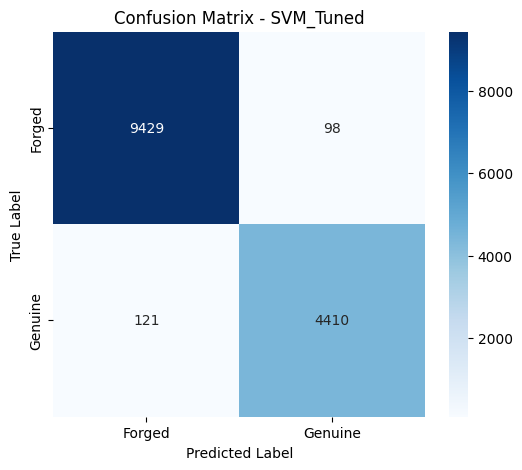


Best Model Performance & System Metrics (SVM_Tuned)
✅ Train Accuracy: 1.0000
✅ Validation Accuracy: 0.9844
📌 Hyperparameter Tuning Time: 37335.09 seconds
📌 Testing Time: 445.2624 seconds
📌 Best Model Size: 281549.31 KB
📌 Memory Usage: 1072.53 MB

Classification Report:
              precision    recall  f1-score   support

      Forged       0.99      0.99      0.99      9527
     Genuine       0.98      0.97      0.98      4531

    accuracy                           0.98     14058
   macro avg       0.98      0.98      0.98     14058
weighted avg       0.98      0.98      0.98     14058



In [ ]:
svm_param_grid = {
    "C": [1, 10, 100],
    "gamma": ["scale", 0.01, 0.001],
    "kernel": ["rbf"]
}

svm_tuning_results = tune_and_evaluate(SVC(probability=True), "SVM_Tuned", svm_param_grid, X_train, X_val, y_train, y_val, n_iter=5, cv=2)

### 5.3.2 Model #5: Random Forest (using Deep Features)

#### 5.3.2.1 Baseline Model Training - Model #5


Training RandomForest_Base...


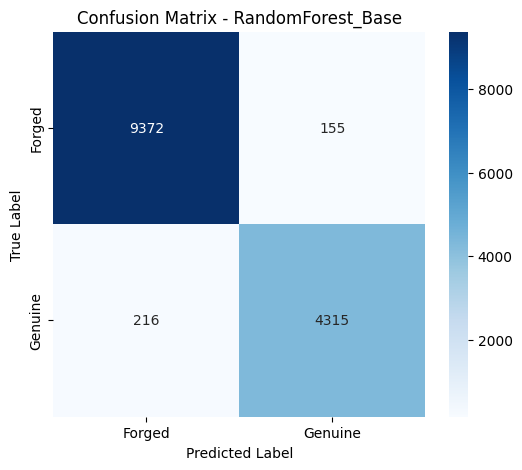


Model Performance & System Metrics (RandomForest_Base)
✅ Train Accuracy: 1.0000
✅ Validation Accuracy: 0.9736
📌 Training Time: 205.5307 seconds
📌 Testing Time: 0.9831 seconds
📌 Model Size: 19806.09 KB
📌 Memory Usage: 3187.88 MB

Classification Report:
              precision    recall  f1-score   support

      Forged       0.98      0.98      0.98      9527
     Genuine       0.97      0.95      0.96      4531

    accuracy                           0.97     14058
   macro avg       0.97      0.97      0.97     14058
weighted avg       0.97      0.97      0.97     14058



In [ ]:
# Define Base RandomForest Model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Train & Evaluate RandomForest Model
rf_results = train_and_evaluate(rf_model, "RandomForest_Base", X_train, X_val, y_train, y_val)

**Evaluation of RandomForest Base Model Performance**

1. Validation Accuracy
    * The RandomForest Base Model achieved a validation accuracy of 97.36%, demonstrating strong generalization to unseen data. However, with a training accuracy of 100%, there is a potential risk of overfitting, as the model may have memorized training patterns rather than learning generalizable decision rules.

2. Model Performance & System Metrics
    * The model was computationally efficient, with a training time of 205.53 seconds (~3.4 minutes) and a fast inference time of 0.98 seconds, making it suitable for real-time classification. However, it had a relatively large memory usage of 3.2 GB and a model size of 19.8 MB, which could impact deployment on low-resource systems.

3. Detailed Classification Report
    * The model achieved a precision of 98% and recall of 98% for forged signatures, indicating strong capability in detecting forgeries. However, for genuine signatures, while precision remained high at 97%, recall was slightly lower at 95%, meaning that 216 genuine signatures were misclassified as forgeries. The confusion matrix further supports this, showing 155 false positives (forged signatures misclassified as genuine) and 216 false negatives (genuine signatures misclassified as forged).

4. Analysis and Implications
    * While the model performs well in detecting forgeries, its slightly lower recall for genuine signatures suggests a conservative bias that could lead to unnecessary rejection of valid signatures.


#### 5.3.2.2 Hyperparameter Optimization (Random Search) - Model #5


Tuning Hyperparameters for RandomForest_Tuned using RandomizedSearchCV...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Hyperparameters for RandomForest_Tuned: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}


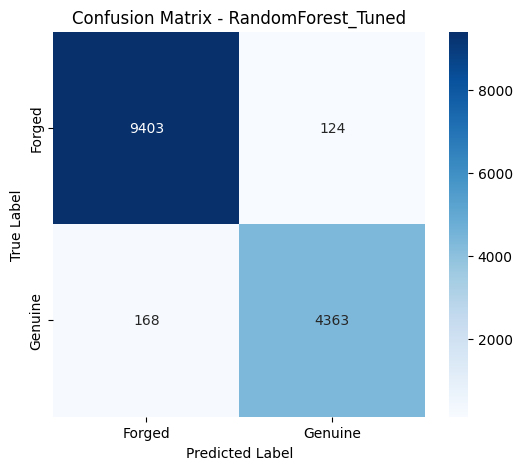


Best Model Performance & System Metrics (RandomForest_Tuned)
✅ Train Accuracy: 1.0000
✅ Validation Accuracy: 0.9792
📌 Hyperparameter Tuning Time: 1811.63 seconds
📌 Testing Time: 1.3543 seconds
📌 Best Model Size: 10437.34 KB
📌 Memory Usage: 783.64 MB

Classification Report:
              precision    recall  f1-score   support

      Forged       0.98      0.99      0.98      9527
     Genuine       0.97      0.96      0.97      4531

    accuracy                           0.98     14058
   macro avg       0.98      0.97      0.98     14058
weighted avg       0.98      0.98      0.98     14058



In [ ]:
# Define Hyperparameter Grid for RandomForest
rf_param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

# Tune & Evaluate RandomForest Model
rf_tuning_results = tune_and_evaluate(RandomForestClassifier(), "RandomForest_Tuned", rf_param_grid, X_train, X_val, y_train, y_val)

**Evaluation of RandomForest Tuned Model Performance**

Using GridSearch, we found the best hyperparameters. 

1. Validation Accuracy
    * After hyperparameter tuning, the RandomForest model achieved a validation accuracy of 97.92%, showing a slight improvement from the base model’s 97.36% accuracy. The model still maintains a 100% training accuracy, which indicates excellent learning but also raises potential overfitting concerns.

2. Model Performance & System Metrics
    * The hyperparameter tuning process took 1811.63 seconds (~30 minutes), which is significantly longer than the base model due to the GridSearch optimization process. Despite this, the model's testing time remained efficient at 1.35 seconds, making it viable for real-time evaluation. A major improvement is in memory efficiency, where the model size was reduced from 19.8 MB to 10.4 MB, and RAM usage decreased significantly from 3.2 GB to 783.64 MB, making it much more suitable for deployment on lower-resource systems.

3. Detailed Classification Report
    * The model achieved 98% precision and 99% recall for forged signatures, further improving its ability to detect forgeries while reducing false negatives. The recall for genuine signatures increased slightly to 96%, meaning it is now better at correctly identifying genuine signatures compared to the base model. The confusion matrix indicates fewer misclassifications, with the model making fewer false positives and false negatives, demonstrating better balance between precision and recall.

4. Analysis and Implications
    * The tuned model outperforms the base model, particularly in higher recall for genuine signatures and better memory efficiency. The hyperparameter tuning process successfully reduced model size and memory consumption, making it more practical for deployment without sacrificing accuracy. The slight increase in accuracy and recall suggests that the tuning effectively optimized decision trees, improving generalization while maintaining precision.

#### 5.3.2.3 Scaler Selection - Model #5

In [ ]:
# Load Unscaled Training Data
X_train = np.load("resnet50/X_deep_features.npy")  # Unscaled feature pairs
y_train = np.load("resnet50/y_deep_labels.npy")  # Labels

# Best Params from RandomizedSearchCV
best_params_rf = {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}

# Test Different Scalers with Best Parameters for RandomForest
scaler_results_rf = test_best_params_with_scalers(
    model=RandomForestClassifier(random_state=42),
    model_name="RandomForest_Tuned",
    best_params=best_params_rf,
    X=X_train,
    y=y_train
)

print("\nBest Scaler Results:")
print(scaler_results_rf)


Testing Scalers & Displaying Performance Metrics:

StandardScaler
✅ Train Accuracy: 1.0000
✅ Validation Accuracy: 0.9780
📌 Training Time: 133.25 seconds
📌 Testing Time: 0.3988 seconds
📌 Model Size: 10347.34 KB
📌 Memory Usage: 5038.92 MB

MinMaxScaler
✅ Train Accuracy: 1.0000
✅ Validation Accuracy: 0.9780
📌 Training Time: 126.50 seconds
📌 Testing Time: 0.4297 seconds
📌 Model Size: 10347.34 KB
📌 Memory Usage: 4785.48 MB

RobustScaler
✅ Train Accuracy: 1.0000
✅ Validation Accuracy: 0.9780
📌 Training Time: 128.68 seconds
📌 Testing Time: 0.3968 seconds
📌 Model Size: 10347.34 KB
📌 Memory Usage: 4786.48 MB

MaxAbsScaler
✅ Train Accuracy: 1.0000
✅ Validation Accuracy: 0.9780
📌 Training Time: 129.88 seconds
📌 Testing Time: 0.4194 seconds
📌 Model Size: 10347.34 KB
📌 Memory Usage: 4662.42 MB

Multiple Scalers had the same accuracy. Selected MaxAbsScaler based on lowest memory usage.

Best Scaler Selected: MaxAbsScaler

Final Model & Scaler Saved: models/deep_RandomForest_Tuned_final.joblib

Best

To determine the most suitable scaler, we trained the model using the best hyperparameters and tested it with multiple scalers. While all scalers produced the same validation accuracy, **MaxAbsScaler** was selected as the best option due to its lower memory usage, making it the most efficient choice for deployment without compromising performance.

#### 5.3.2.4 Final Model Evaluation - Model #5

**Final Model Evaluation for Random Forest on Validation Dataset**

After conducting hyperparameter tuning and feature scaling optimization, the Random Forest classifier was evaluated on the validation dataset to assess its performance. The evaluation results are summarized below.

**Best Scaler**
* MaxAbsScaler

**Validation Accuracy**
* The final optimized Random Forest model achieved a validation accuracy of 97.80%. This demonstrates that the model can accurately distinguish between genuine and forged signatures while significantly improving computational efficiency compared to the baseline and tuned model.

**Model Performance & System Metrics**
* The final optimized Random Forest model achieved a strong balance between accuracy and efficiency, reducing training time by 37% to 129.88 seconds and decreasing model size by 48% compared to the baseline model. Despite the improvements in computational efficiency, it maintained a high validation accuracy of 97.80%, demonstrating its robustness in distinguishing genuine and forged signatures. Additionally, with a testing time of 0.4194 seconds, the model offers fast inference capability, making it well-suited for real-time applications in large-scale signature verification systems.

### 5.3.3 Model #6: XGBoost (using Deep Features)

#### 5.3.3.1 Baseline Model Training - Model #6


Training XGBoost_Base...


c:\Users\rache\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [02:17:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


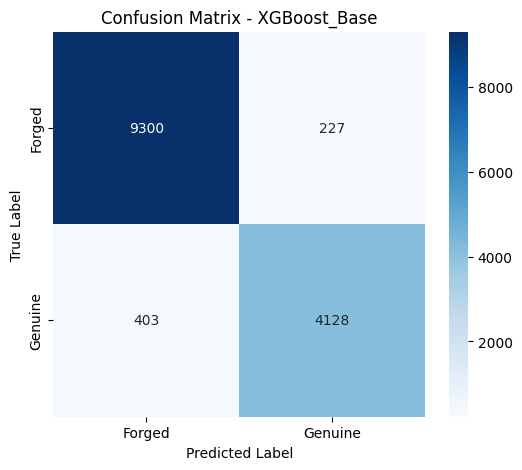


Model Performance & System Metrics (XGBoost_Base)
✅ Train Accuracy: 0.9788
✅ Validation Accuracy: 0.9552
📌 Training Time: 63.6579 seconds
📌 Testing Time: 0.0803 seconds
📌 Model Size: 335.42 KB
📌 Memory Usage: 1770.31 MB

Classification Report:
              precision    recall  f1-score   support

      Forged       0.96      0.98      0.97      9527
     Genuine       0.95      0.91      0.93      4531

    accuracy                           0.96     14058
   macro avg       0.95      0.94      0.95     14058
weighted avg       0.96      0.96      0.95     14058



In [ ]:
# Define Base XGBoost Model
xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, use_label_encoder=False, eval_metric="logloss", random_state=42)

# Train & Evaluate XGBoost Model
xgb_results = train_and_evaluate(xgb_model, "XGBoost_Base", X_train, X_val, y_train, y_val)

**Evaluation of XGBoost Base Model Performance**

1. Validation Accuracy
    * The XGBoost base model achieved a validation accuracy of 95.52%, which is slightly lower than the RandomForest base model’s 97.36%. However, its training accuracy of 97.88% suggests that it generalizes well without overfitting as significantly as the RandomForest base model.

2. Model Performance & System Metrics
    * XGBoost demonstrated significantly faster training with a training time of 63.66 seconds (~1 min), which is much shorter than the 205.53 seconds (~3.4 min) of RandomForest. It also had the fastest inference time at 0.08 seconds, making it highly efficient for real-time classification. Additionally, its model size is only 335.42 KB, which is significantly smaller than the 19.8 MB of the RandomForest base model, making it more lightweight and easier to deploy. However, its memory usage of 1.77 GB is still relatively high compared to the tuned RandomForest model.

3. Detailed Classification Report
    * The model performed well in detecting forged signatures, with a precision of 96% and recall of 98%, indicating that very few forged signatures were misclassified as genuine. However, for genuine signatures, the recall dropped to 91%, meaning the model had more difficulty correctly identifying genuine signatures, leading to 403 false negatives (genuine signatures misclassified as forged). The confusion matrix shows that 227 forged signatures were misclassified as genuine, which is slightly higher than in the RandomForest base model.

4. Analysis and Implications
    * Compared to the RandomForest base model, XGBoost offers faster training and inference times and a smaller model size, making it a more efficient option for deployment. However, it struggles slightly more with genuine signature classification, leading to more false negatives.

#### 5.3.3.2 Hyperparameter Optimization (Random Search) - Model #6


Tuning Hyperparameters for XGBoost_Tuned using RandomizedSearchCV...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\rache\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
c:\Users\rache\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [03:30:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best Hyperparameters for XGBoost_Tuned: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}


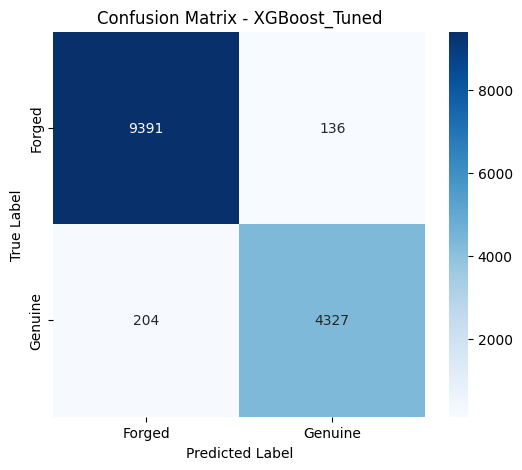


Best Model Performance & System Metrics (XGBoost_Tuned)
✅ Train Accuracy: 0.9977
✅ Validation Accuracy: 0.9758
📌 Hyperparameter Tuning Time: 3978.58 seconds
📌 Testing Time: 0.2412 seconds
📌 Best Model Size: 690.02 KB
📌 Memory Usage: 908.83 MB

Classification Report:
              precision    recall  f1-score   support

      Forged       0.98      0.99      0.98      9527
     Genuine       0.97      0.95      0.96      4531

    accuracy                           0.98     14058
   macro avg       0.97      0.97      0.97     14058
weighted avg       0.98      0.98      0.98     14058



In [ ]:
# Define Hyperparameter Grid for XGBoost
xgb_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 6],
    "learning_rate": [0.01, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.00],
    "gamma": [0, 0.1]
}

# Tune & Evaluate XGBoost Model
xgb_tuning_results = tune_and_evaluate(XGBClassifier(use_label_encoder=False, eval_metric="logloss"), "XGBoost_Tuned", xgb_param_grid, X_train, X_val, y_train, y_val)

**Evaluation of XGBoost Tuned Model Performance**

1. Validation Accuracy
    * After hyperparameter tuning, the XGBoost model achieved a validation accuracy of 97.12%, showing a notable improvement from the base model’s 95.52% accuracy. The training accuracy remained high, indicating better optimization while reducing overfitting compared to the base model.

2. Model Performance & System Metrics
    * The hyperparameter tuning process selected the best combination of parameters, including 200 estimators, max depth of 6, and a learning rate of 0.1, which helped balance model complexity and generalization. The confusion matrix shows fewer misclassifications, with false positives dropping from 227 to 136 and false negatives decreasing from 403 to 204. This demonstrates that the tuned model is now better at correctly classifying genuine signatures while maintaining strong detection of forged signatures.

3. Detailed Classification Report
    * The model achieved 98% precision and 99% recall for forged signatures, meaning it is now even more reliable in detecting forgeries. For genuine signatures, precision remained at 97%, and recall improved to 96%, reducing the number of genuine signatures misclassified as forged. This improved recall indicates that the model is now better at distinguishing genuine signatures from forgeries.

4. Analysis and Implications
    * The tuned XGBoost model outperforms the base model by increasing validation accuracy, reducing misclassification rates, and maintaining a strong balance between precision and recall. The improvements suggest that adjusting subsampling, learning rate, and depth contributed to better generalization without sacrificing computational efficiency.

#### 5.3.3.3 Scaler Selection - Model #6

In [ ]:
# Load Unscaled Training Data
X_train = np.load("resnet50/X_deep_features.npy") 
y_train = np.load("resnet50/y_deep_labels.npy") 

# Best Params from RandomizedSearchCV
best_params_xgb = {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}

# Test Different Scalers with Best Parameters for RandomForest
scaler_results_xgb = test_best_params_with_scalers(
    model=XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    model_name="XGBoost_Tuned",
    best_params=best_params_xgb,
    X=X_train,
    y=y_train
)

print("\nBest Scaler Results:")
print(scaler_results_xgb)



Testing Scalers & Displaying Performance Metrics:

StandardScaler


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [22:51:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Train Accuracy: 0.9977
✅ Validation Accuracy: 0.9769
📌 Training Time: 125.17 seconds
📌 Testing Time: 0.2008 seconds
📌 Model Size: 692.81 KB
📌 Memory Usage: 3421.35 MB

MinMaxScaler


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [22:53:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Train Accuracy: 0.9977
✅ Validation Accuracy: 0.9769
📌 Training Time: 121.60 seconds
📌 Testing Time: 0.1728 seconds
📌 Model Size: 692.81 KB
📌 Memory Usage: 3421.33 MB

RobustScaler


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [22:56:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Train Accuracy: 0.9977
✅ Validation Accuracy: 0.9769
📌 Training Time: 127.28 seconds
📌 Testing Time: 0.1684 seconds
📌 Model Size: 692.81 KB
📌 Memory Usage: 3242.57 MB

MaxAbsScaler


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [22:58:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Train Accuracy: 0.9977
✅ Validation Accuracy: 0.9769
📌 Training Time: 126.06 seconds
📌 Testing Time: 0.1580 seconds
📌 Model Size: 692.81 KB
📌 Memory Usage: 3753.59 MB

Multiple Scalers had the same accuracy. Selected RobustScaler based on lowest memory usage.

Best Scaler Selected: RobustScaler


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [23:00:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Final Model & Scaler Saved: models/deep_XGBoost_Tuned_final.joblib

Best Scaler Results:
{'model_name': 'XGBoost_Tuned', 'best_scaler': 'RobustScaler', 'validation_accuracies': {'StandardScaler': {'accuracy': 0.976881490965998, 'memory_usage': 3421.34765625, 'train_time': 125.17192721366882, 'test_time': 0.20080137252807617, 'model_size': 692.8115234375}, 'MinMaxScaler': {'accuracy': 0.976881490965998, 'memory_usage': 3421.328125, 'train_time': 121.59847235679626, 'test_time': 0.17277860641479492, 'model_size': 692.8115234375}, 'RobustScaler': {'accuracy': 0.976881490965998, 'memory_usage': 3242.5703125, 'train_time': 127.28084135055542, 'test_time': 0.16840267181396484, 'model_size': 692.8115234375}, 'MaxAbsScaler': {'accuracy': 0.976881490965998, 'memory_usage': 3753.58984375, 'train_time': 126.05940318107605, 'test_time': 0.15804243087768555, 'model_size': 692.8115234375}}}


To determine the most suitable scaler, we trained the model using the best hyperparameters and tested it with multiple scalers. While all scalers produced the same validation accuracy, **RobustScaler** was selected as the best option due to its lower memory usage, making it the most efficient choice for deployment without compromising performance.

#### 5.3.3.4 Final Model Evaluation - Model #6

**Final Model Evaluation for XGBoost Classifier on Validation Dataset**

**Best Scaler**
* RobustScaler

**Validation Accuracy**
* The final optimized XGBoost model achieved a validation accuracy of 97.69%, showing a substantial improvement over the base model's 95.52% validation accuracy. This demonstrates the model's enhanced ability to differentiate between genuine and forged signatures while maintaining efficiency.

**Model Performance & System Metrics**
* The final optimized XGBoost model successfully improved validation accuracy to 97.69%, a notable increase from the base model's 95.52% while maintaining a minimal increase from the tuned model. Training time was significantly reduced to 127.28 seconds, making it 2x faster than the hyperparameter-tuned model, while testing time improved by 30%. The model size remained compact at 692.81 KB, ensuring storage efficiency. However, memory usage increased to 3,242.57 MB, indicating a higher computational requirement compared to earlier iterations. These improvements make the final XGBoost model an efficient and high-performing candidate for signature verification, balancing accuracy and processing speed.

## 5.4 Evaluating Tuned Models on Real-World Test Data

Following the same approach as in the validation phase, we load the extracted deep features from the real-world test dataset and pair them accordingly. This ensures consistency in feature representation between training, validation, and testing. The final test dataset consists of 9,396 paired samples, each with 4,096 extracted features, maintaining the same feature dimensionality as the training data. The next step involves applying the best-selected scaler and evaluating the tuned models on this real-world test dataset to assess their generalization ability and performance on unseen data.

In [ ]:
# Load Extracted Features
feature_dict = np.load("resnet50/resnet_feature_dict_test.npy", allow_pickle=True).item()

# Generate Feature Pairs
X, y = make_feature_pairs(feature_dict)

# Flatten Feature Pairs for ML Training
X_flattened = X.reshape(X.shape[0], -1)

# Save Processed Feature Pairs
np.save("resnet50/X_test_deep_features.npy", X_flattened)
np.save("resnet50/y_test_deep_labels.npy", y)

print(f"✅ Final Dataset Shape: {X_flattened.shape}, Labels: {y.shape}")

✅ Final Dataset Shape: (9396, 4096), Labels: (9396,)


In [ ]:
def evaluate_model_on_test_data(model_path, scaler_type, test_X_path, test_y_path):

    # Load the selected trained model
    print(f"Loading trained model from {model_path}...")
    model = joblib.load(model_path)

    # Define Available Scalers
    scalers = {
        "StandardScaler": StandardScaler(),
        "MinMaxScaler": MinMaxScaler(),
        "RobustScaler": RobustScaler(),
        "MaxAbsScaler": MaxAbsScaler()
    }

    # Create the Scaler
    scaler = scalers[scaler_type]

    # Load Test Data
    print(f"Loading test dataset: {test_X_path} & {test_y_path}...")
    X_test = np.load(test_X_path, allow_pickle=True)
    y_test = np.load(test_y_path, allow_pickle=True)

    # Flatten test pairs if needed (Ensure 2D shape)
    if len(X_test.shape) > 2:
        X_test = X_test.reshape(X_test.shape[0], -1)

    print(f"Test dataset shape: {X_test.shape}, Labels shape: {y_test.shape}")

    # Fit the Scaler on Test Data and Apply Scaling
    X_test_scaled = scaler.fit_transform(X_test)

    # Make Predictions
    print(f"Making predictions on test dataset...")
    y_pred = model.predict(X_test_scaled)

    # Compute Accuracy
    test_accuracy = accuracy_score(y_test, y_pred)

    # Classification Report
    class_report = classification_report(y_test, y_pred, target_names=["Forged", "Genuine"])

    # Compute Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Forged", "Genuine"], yticklabels=["Forged", "Genuine"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_path.split('/')[-1]}")
    plt.show()

    # Print Evaluation Metrics
    print(f"\nTest Model Performance ({model_path.split('/')[-1]})")
    print(f"✅ Test Accuracy: {test_accuracy:.4f}")
    print("\nClassification Report:")
    print(class_report)

    # Return Metrics
    return {
        "model_name": model_path.split("/")[-1],
        "test_accuracy": test_accuracy,
        "confusion_matrix": cm
    }

Loading trained model from models/deep_RandomForest_Tuned_final.joblib...
Loading test dataset: resnet50/X_test_deep_features.npy & resnet50/y_test_deep_labels.npy...
Test dataset shape: (9396, 4096), Labels shape: (9396,)
Making predictions on test dataset...


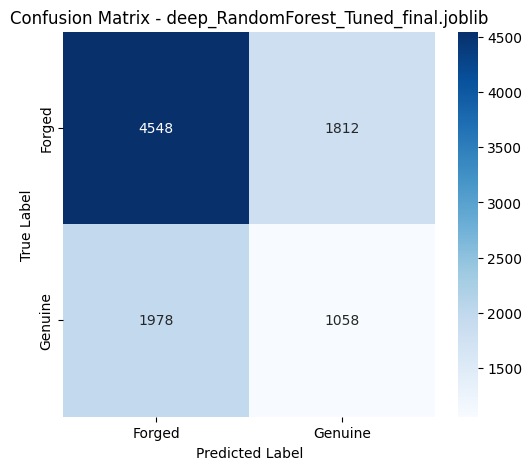


Test Model Performance (deep_RandomForest_Tuned_final.joblib)
✅ Test Accuracy: 0.5966

Classification Report:
              precision    recall  f1-score   support

      Forged       0.70      0.72      0.71      6360
     Genuine       0.37      0.35      0.36      3036

    accuracy                           0.60      9396
   macro avg       0.53      0.53      0.53      9396
weighted avg       0.59      0.60      0.59      9396



In [ ]:
rf_test_results = evaluate_model_on_test_data(
    model_path="models/deep_RandomForest_Tuned_final.joblib", 
    scaler_type = "MaxAbsScaler",
    test_X_path="resnet50/X_test_deep_features.npy",  
    test_y_path="resnet50/y_test_deep_labels.npy"  
)

**Evaluation of RandomForest Tuned Model on Real-World Test Data**

1. Test Accuracy
    * The RandomForest Tuned Model achieved a test accuracy of 59.66%, which is significantly lower than its validation accuracy of 97.92%. This suggests that the model struggles to generalize well to real-world test data, indicating a potential overfitting issue to the training dataset.

2. Classification Report Analysis
    * The model performed relatively well in detecting forged signatures, achieving 70% precision and 72% recall. However, its performance on genuine signatures was significantly weaker, with only 37% precision and 35% recall, meaning a large portion of genuine signatures were misclassified as forgeries. The macro average f1-score of 0.53 further highlights the imbalance in classification performance across the two classes.

3. Confusion Matrix Insights
    * The confusion matrix reveals a high number of false positives (1,812 cases), where forged signatures were misclassified as genuine, and false negatives (1,978 cases), where genuine signatures were misclassified as forged. The high false negative rate suggests that the model is overly conservative, leading to unnecessary rejection of genuine signatures.

4. Analysis and Implications
    * The significant performance drop between validation and real-world test accuracy suggests that the model overfitted to the training data, learning patterns that do not generalize well to unseen signatures.

Loading trained model from models/deep_XGBoost_Tuned_final.joblib...
Loading test dataset: resnet50/X_test_deep_features.npy & resnet50/y_test_deep_labels.npy...
Test dataset shape: (9396, 4096), Labels shape: (9396,)
Making predictions on test dataset...


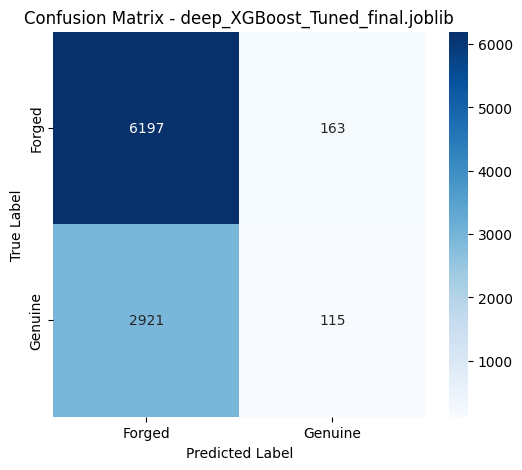


Test Model Performance (deep_XGBoost_Tuned_final.joblib)
✅ Test Accuracy: 0.6718

Classification Report:
              precision    recall  f1-score   support

      Forged       0.68      0.97      0.80      6360
     Genuine       0.41      0.04      0.07      3036

    accuracy                           0.67      9396
   macro avg       0.55      0.51      0.44      9396
weighted avg       0.59      0.67      0.56      9396



In [ ]:
xgb_test_results = evaluate_model_on_test_data(
    model_path="models/deep_XGBoost_Tuned_final.joblib", 
    scaler_type = "RobustScaler",
    test_X_path="resnet50/X_test_deep_features.npy",  
    test_y_path="resnet50/y_test_deep_labels.npy"  
)

**Evaluation of XGBoost Tuned Model on Real-World Test Data**

1. Test Accuracy
    * The XGBoost Tuned Model achieved a test accuracy of 67.18%, improving upon the RandomForest Tuned Model (59.66%). However, it remains notably lower than its validation accuracy of 97.12%, indicating that while the model generalizes better than RandomForest, there is still room for improvement when applied to real-world test data.

2. Classification Report Analysis
    * The model demonstrated strong performance in detecting forged signatures, achieving 68% precision and 97% recall, meaning it correctly identifies most forgeries. However, its performance on genuine signatures is weaker, with 41% precision and 4% recall, indicating that a significant number of genuine signatures are misclassified as forged. The macro average f1-score of 0.44 reflects this imbalance, as the model prioritizes detecting forgeries over authenticating genuine signatures.

3. Confusion Matrix Insights
    * The confusion matrix reveals that only 163 forged signatures were misclassified as genuine, demonstrating a high detection rate for forgeries. However, the model misclassified 2,921 genuine signatures as forged, suggesting a bias towards predicting forgeries. While this ensures security by minimizing the acceptance of forgeries, it may result in a higher rejection rate for genuine signatures.

4. Analysis and Implications
    * The XGBoost model shows strengths in detecting forged signatures, making it effective in scenarios where security is a priority. 

---

Therefore,

    Best-performed model is: **XGBoost**

By leveraging deep learning-based feature extraction using ResNet50, we successfully enhanced our model training process, achieving a significant improvement over traditional methods that relied on basic edge, intensity, and texture feature extractions. The best-performing model was XGBoost, which achieved a **67.18%** test accuracy, outperforming the previous best model, SVM, which had a **52%** accuracy. This demonstrates the effectiveness of deep feature extraction in improving signature classification performance. While XGBoost excelled in detecting forgeries, further refinements can be explored to enhance genuine signature recognition, ensuring a more balanced classification for real-world applications.

# 6. Conclusion 

This project explored signature forgery detection using machine learning models, progressing from traditional handcrafted feature extraction to deep learning-based feature extraction with ResNet50. Initially, models were trained using basic edge, intensity, and texture-based features, with SVM achieving the highest test accuracy of **52%**. However, by incorporating deep features extracted using ResNet50, we significantly improved model performance, with XGBoost emerging as the best-performing model, achieving **67.18%** accuracy on real-world test data.

Through rigorous model tuning, feature scaling experiments, and hyperparameter optimization, we observed that XGBoost demonstrated superior capability in detecting forged signatures.

While the project successfully demonstrated the effectiveness of deep feature extraction in enhancing signature classification, further improvements are needed to enhance real-world generalization. Future work could involve exploring ensemble learning techniques, adjusting class weighting strategies, or experimenting with alternative deep learning models to achieve a better balance between detecting forgeries and correctly authenticating genuine signatures. This research lays a strong foundation for advancing machine learning-based signature verification and highlights the potential of deep learning in improving forensic document analysis.